<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:20px;">

<h1 style="color:#FF0000; text-transform:uppercase;
           font-family:'Times New Roman', Times, serif;
           text-align:center; font-size:28px;
           margin-top:10px; margin-bottom:10px;">
  <b>ANALYSE UNIVARIÉE</b>
</h1>

<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:30px;">


In [1]:
import pandas as pd

In [2]:
# 1️⃣ Chargement du fichier CSV
df = pd.read_csv("Actuar0.csv", sep=";", low_memory=False)

In [3]:
# 2️⃣ Conversion des variables catégorielles (optimisation mémoire)
categorical_cols = ["zone", "marque", "carburant", "region", "garantie"]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

In [4]:
# Aperçu des premières lignes
print("=== APERÇU DU DATASET ===")
display(df.head())

=== APERÇU DU DATASET ===


,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,garantie,cout,frequence,severite,prime_pure
0,0.74,A,5,4,31,64,3,D,21,8,1,1Rc,287.82,1.351351,287.82,388.945946
1,0.18,B,7,8,22,100,2,E,26,0,1,1Rc,316.82,5.555556,316.82,1760.111111
2,0.48,C,9,0,32,61,12,E,41,13,1,4Bg,687.82,2.083333,687.82,1432.958333
3,0.27,F,7,5,39,100,12,E,11,0,1,2Do,96.64,3.703704,96.64,357.925926
4,0.51,E,4,0,49,50,12,E,31,13,1,2Do,70.88,1.960784,70.88,138.980392


In [5]:
# Informations sur les types de variables
print("\n=== INFO ===")
df.info()


=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   exposition     2740 non-null   float64 
 1   zone           2740 non-null   category
 2   puissance      2740 non-null   int64   
 3   agevehicule    2740 non-null   int64   
 4   ageconducteur  2740 non-null   int64   
 5   bonus          2740 non-null   int64   
 6   marque         2740 non-null   category
 7   carburant      2740 non-null   category
 8   densite        2740 non-null   int64   
 9   region         2740 non-null   category
 10  nbre           2740 non-null   int64   
 11  garantie       2740 non-null   category
 12  cout           2740 non-null   float64 
 13  frequence      2740 non-null   float64 
 14  severite       2740 non-null   float64 
 15  prime_pure     2740 non-null   float64 
dtypes: category(5), float64(5), int64(6)
memory usage: 250.6 KB


In [6]:
# Statistiques descriptives des variables numériques
print("\n=== DESCRIPTION STATISTIQUE ===")
display(df.describe())


=== DESCRIPTION STATISTIQUE ===


,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout,frequence,severite,prime_pure
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,0.737073,6.372628,6.211679,44.127737,61.157664,49.072263,1.705839,1019.345159,3.505207,708.297219,2249.112166
std,0.297456,1.902377,4.711433,13.948941,16.633343,27.834236,0.954402,1622.801518,4.813814,1251.353502,5824.489662
min,0.050000,4.000000,0.000000,18.000000,50.000000,11.000000,1.000000,27.733700,1.000000,5.546740,27.733700
25%,0.497500,5.000000,2.000000,33.000000,50.000000,24.000000,1.000000,236.932500,1.111111,156.278750,306.726062
50%,0.865000,6.000000,5.000000,43.000000,50.000000,52.000000,1.000000,517.740000,2.000000,316.820000,784.708333
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.000000,2.000000,1128.120000,3.703704,708.912500,1785.121709
max,1.000000,15.000000,30.000000,99.000000,165.000000,93.000000,7.000000,10800.259400,42.857143,10800.259400,127135.800000


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Variables numériques</b>
  </h2>
</div>


In [7]:
# =========================================================
# 🎯 ANALYSE UNIVARIÉE – VARIABLES NUMÉRIQUES (STRUCTURÉE)
#   -> export_univarie/{tableaux,graphiques,logs}/numeriques/
# =========================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, jarque_bera, skew, kurtosis
from datetime import datetime

# ---------------------------------------------------------
# 1️⃣ STRUCTURE DES DOSSIERS D’EXPORT
# ---------------------------------------------------------
root_export = "export_univarie"
folders = {
    "tableaux": os.path.join(root_export, "tableaux", "numeriques"),
    "graphiques": os.path.join(root_export, "graphiques", "numeriques"),
    "logs": os.path.join(root_export, "logs", "numeriques"),
}
for f in folders.values():
    os.makedirs(f, exist_ok=True)

sns.set_theme(style="whitegrid", context="notebook")

# ---------------------------------------------------------
# 2️⃣ VARIABLES NUMÉRIQUES À ANALYSER
# ---------------------------------------------------------
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print(f"Variables numériques détectées ({len(numeric_cols)}) : {numeric_cols}")

# ---------------------------------------------------------
# 3️⃣ TABLEAUX D’EFFECTIFS / FRÉQUENCES / CUMULS
#    (sur les valeurs observées)
# ---------------------------------------------------------
for col in numeric_cols:
    serie = df[col].dropna()
    eff = serie.value_counts().sort_index()
    table_effectif = pd.DataFrame({
        "Modalité": eff.index,
        "Effectif": eff.values
    })
    table_effectif["Fréquence (%)"] = (table_effectif["Effectif"] / len(serie) * 100).round(2)
    table_effectif["Fréquence cumulée (%)"] = table_effectif["Fréquence (%)"].cumsum()

    path_csv = os.path.join(folders["tableaux"], f"univarie_{col}_effectifs_frequences.csv")
    table_effectif.to_csv(path_csv, index=False, encoding="utf-8-sig")
    print(f"💾 Tableau enregistré : {path_csv}")

# ---------------------------------------------------------
# 4️⃣ RÉSUMÉ STATISTIQUE + TESTS DE NORMALITÉ
# ---------------------------------------------------------
records = []
for col in numeric_cols:
    serie = df[col].dropna()
    desc = serie.describe()

    # Moments
    skewness = skew(serie)
    kurt = kurtosis(serie)

    # Tests de normalité (échantillonnage si besoin)
    sample = serie.sample(min(5000, len(serie)), random_state=42)
    try:
        sh_stat, sh_p = shapiro(sample)
    except Exception:
        sh_stat, sh_p = np.nan, np.nan
    jb_stat, jb_p = jarque_bera(sample)

    records.append({
        "Variable": col,
        "N": len(serie),
        "Moyenne": desc.get("mean", np.nan),
        "Écart-type": desc.get("std", np.nan),
        "Min": desc.get("min", np.nan),
        "Q1": desc.get("25%", np.nan),
        "Médiane": desc.get("50%", np.nan),
        "Q3": desc.get("75%", np.nan),
        "Max": desc.get("max", np.nan),
        "Skewness": float(skewness),
        "Kurtosis": float(kurt),
        "Shapiro_p": float(sh_p) if pd.notna(sh_p) else np.nan,
        "JarqueBera_p": float(jb_p),
    })

resume_stats = pd.DataFrame(records)
resume_path = os.path.join(folders["tableaux"], "resume_univarie_numerique.csv")
resume_stats.to_csv(resume_path, index=False, encoding="utf-8-sig")
try:
    display(resume_stats)
except Exception:
    pass
print(f"💾 Résumé statistique exporté : {resume_path}")

# ---------------------------------------------------------
# 5️⃣ VISUALISATIONS – HISTOGRAMMES + KDE + BOX PLOTS
# ---------------------------------------------------------
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogramme + KDE
    sns.histplot(df[col], kde=True, color="cornflowerblue", ax=axes[0])
    axes[0].set_title(f"Distribution de {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence")

    # Boxplot
    sns.boxplot(x=df[col], color="orange", ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    file_path = os.path.join(folders["graphiques"], f"{col}_distribution_box.png")
    plt.savefig(file_path, dpi=120)
    plt.close(fig)

print(f"💾 Graphiques enregistrés dans : {folders['graphiques']}")

# ---------------------------------------------------------
# 6️⃣ LOGS D’EXÉCUTION (DATE, VARIABLES, FICHIERS)
# ---------------------------------------------------------
log_path = os.path.join(folders["logs"], "rapport_execution_numeriques.txt")
with open(log_path, "w", encoding="utf-8") as log:
    log.write("Rapport d'exécution – Analyse univariée (numériques)\n")
    log.write(f"Date : {datetime.now()}\n")
    log.write(f"Variables analysées : {', '.join(numeric_cols)}\n\n")
    log.write("Dossiers créés :\n")
    for name, path in folders.items():
        log.write(f"  - {name}: {os.path.abspath(path)}\n")
    log.write("\nFichiers exportés :\n")
    for root, _, files in os.walk(os.path.join(root_export, "tableaux", "numeriques")):
        for f in files:
            log.write(f"  {os.path.join(root, f)}\n")
    for root, _, files in os.walk(os.path.join(root_export, "graphiques", "numeriques")):
        for f in files:
            log.write(f"  {os.path.join(root, f)}\n")
print(f"📝 Log d'exécution enregistré : {log_path}")

# ---------------------------------------------------------
# 7️⃣ SYNTHÈSE GLOBALE
# ---------------------------------------------------------
print("\n=== SYNTHÈSE NUMÉRIQUE ===")
print(f"Variables numériques analysées : {len(numeric_cols)}")
print("Tous les résultats (tableaux, graphiques, logs) sont disponibles dans :")
for name, path in folders.items():
    print(f"   📁 {name.capitalize()} → {os.path.abspath(path)}")


Variables numériques détectées (11) : ['exposition', 'puissance', 'agevehicule', 'ageconducteur', 'bonus', 'densite', 'nbre', 'cout', 'frequence', 'severite', 'prime_pure']
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_exposition_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_puissance_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_agevehicule_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_ageconducteur_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_bonus_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_densite_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_nbre_effectifs_frequences.csv
💾 Tableau enregistré : export_univarie\tableaux\numeriques\univarie_cout_effectifs_frequences.csv
💾 Tableau en

,Variable,N,Moyenne,Écart-type,Min,Q1,Médiane,Q3,Max,Skewness,Kurtosis,Shapiro_p,JarqueBera_p
0,exposition,2740,0.737073,0.297456,0.05000,0.497500,0.865000,1.000000,1.000000,-0.761436,-0.768513,0.000000e+00,7.318497e-73
1,puissance,2740,6.372628,1.902377,4.00000,5.000000,6.000000,7.000000,15.000000,1.444692,2.923548,8.407791e-44,0.000000e+00
2,agevehicule,2740,6.211679,4.711433,0.00000,2.000000,5.000000,9.000000,30.000000,0.801672,0.331658,5.061607e-33,3.487929e-67
3,ageconducteur,2740,44.127737,13.948941,18.00000,33.000000,43.000000,53.000000,99.000000,0.539946,-0.078754,1.253223e-22,8.626207e-30
4,bonus,2740,61.157664,16.633343,50.00000,50.000000,50.000000,68.000000,165.000000,1.708800,2.763653,0.000000e+00,0.000000e+00
5,densite,2740,49.072263,27.834236,11.00000,24.000000,52.000000,82.000000,93.000000,0.266668,-1.467012,7.426882e-44,3.935171e-61
6,nbre,2740,1.705839,0.954402,1.00000,1.000000,1.000000,2.000000,7.000000,1.787474,4.238214,0.000000e+00,0.000000e+00
7,cout,2740,1019.345159,1622.801518,27.73370,236.932500,517.740000,1128.120000,10800.259400,3.975748,18.287618,0.000000e+00,0.000000e+00
8,frequence,2740,3.505207,4.813814,1.00000,1.111111,2.000000,3.703704,42.857143,4.787396,28.867594,0.000000e+00,0.000000e+00
9,severite,2740,708.297219,1251.353502,5.54674,156.278750,316.820000,708.912500,10800.259400,5.030698,31.784304,0.000000e+00,0.000000e+00


💾 Résumé statistique exporté : export_univarie\tableaux\numeriques\resume_univarie_numerique.csv
💾 Graphiques enregistrés dans : export_univarie\graphiques\numeriques
📝 Log d'exécution enregistré : export_univarie\logs\numeriques\rapport_execution_numeriques.txt

=== SYNTHÈSE NUMÉRIQUE ===
Variables numériques analysées : 11
Tous les résultats (tableaux, graphiques, logs) sont disponibles dans :
   📁 Tableaux → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\tableaux\numeriques
   📁 Graphiques → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\graphiques\numeriques
   📁 Logs → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\logs\numeriques


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Variables catégorielles</b>
  </h2>
</div>

In [8]:
# =========================================================
# 🧩 ANALYSE UNIVARIÉE – 5 CATÉGORIELLES MÉTIER (EXCLUSIF)
#   Exports: export_univarie/{tableaux,graphiques,logs}/categoriels/
# =========================================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# -------------------------------
# 0) Paramètres & dossiers export
# -------------------------------
root_export = "export_univarie"
folders = {
    "tableaux":   os.path.join(root_export, "tableaux",  "categoriels"),
    "graphiques": os.path.join(root_export, "graphiques","categoriels"),
    "logs":       os.path.join(root_export, "logs",      "categoriels"),
}
for p in folders.values():
    os.makedirs(p, exist_ok=True)

sns.set_theme(style="whitegrid", context="notebook")

# -----------------------------------------
# 1) Liste BLANCHE : 5 catégorielles métier
# -----------------------------------------
business_cats = ["zone", "marque", "carburant", "region", "garantie"]

# Forcer le typage uniquement pour ces 5
for c in business_cats:
    if c in df.columns:
        df[c] = df[c].astype("category")

# S’assurer que certaines colonnes restent NUMÉRIQUES
force_numeric = ["puissance", "nbre"]
for c in force_numeric:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("Int64").astype("int64")

# La liste finale à analyser = EXCLUSIVEMENT les 5 métier présentes
cat_cols = [c for c in business_cats if c in df.columns]
print(f"Variables catégorielles 'métier' détectées ({len(cat_cols)}) : {cat_cols}")

if len(cat_cols) == 0:
    raise ValueError("Aucune des 5 variables catégorielles métier n'a été trouvée dans df.")

# -------------------------------------------------------------
# 2) TABLEAUX : Effectifs / Fréquences / Fréquences cumulées
# -------------------------------------------------------------
summary_rows = []

for col in cat_cols:
    s = df[col].astype(str)  # sécurité affichage
    eff = s.value_counts(dropna=False)           # tri par fréquence (desc)
    freq = (eff / len(df) * 100).round(2)
    freq_cum = freq.cumsum().round(2)

    table = pd.DataFrame({
        "Modalité": eff.index,
        "Effectif": eff.values,
        "Fréquence (%)": freq.values,
        "Fréquence cumulée (%)": freq_cum.values
    })

    csv_path = os.path.join(folders["tableaux"], f"univarie_{col}_frequences.csv")
    table.to_csv(csv_path, index=False, encoding="utf-8-sig")

    # Lignes pour le résumé global
    summary_rows.append({
        "Variable": col,
        "Nb_modalités": int(table.shape[0]),
        "Modalité_dominante": table.loc[0, "Modalité"],
        "Poids_dominant (%)": float(table.loc[0, "Fréquence (%)"]),
        "Modalité_la_plus_rare": table.loc[table.index[-1], "Modalité"],
        "Poids_min (%)": float(table.loc[table.index[-1], "Fréquence (%)"]),
    })

# Résumé global
resume_df = pd.DataFrame(summary_rows)
resume_csv = os.path.join(folders["tableaux"], "resume_univarie_categorielles.csv")
resume_df.to_csv(resume_csv, index=False, encoding="utf-8-sig")
try:
    display(resume_df)
except Exception:
    pass
print(f"💾 Résumé global exporté : {resume_csv}")

# -------------------------
# 3) GRAPHIQUES : bar & pie
# -------------------------
def pie_with_others(counts, max_slices=12):
    """Regroupe les petites modalités en 'Autres' pour lisibilité."""
    counts = counts.sort_values(ascending=False)
    if len(counts) <= max_slices:
        return counts
    top = counts.iloc[:max_slices-1]
    others = counts.iloc[max_slices-1:].sum()
    return pd.concat([top, pd.Series({"Autres": others})])

for col in cat_cols:
    # Barplot (effectifs)
    plt.figure(figsize=(8, 4))
    order = df[col].value_counts().index
    sns.countplot(x=col, data=df, order=order, palette="crest")
    plt.title(f"Répartition des modalités – {col}")
    plt.xlabel(col); plt.ylabel("Effectif")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"{col}_barplot.png"), dpi=120)
    plt.close()

    # Pie chart (avec regroupement si nécessaire)
    counts = df[col].value_counts()
    counts_pie = pie_with_others(counts, max_slices=12)
    plt.figure(figsize=(5.5, 5.5))
    plt.pie(counts_pie, labels=counts_pie.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Répartition (%) – {col}")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"{col}_piechart.png"), dpi=120)
    plt.close()

print(f"💾 Graphiques enregistrés dans : {folders['graphiques']}")

# --------------------------
# 4) RAPPORT TEXTE automatique
# --------------------------
log_path = os.path.join(folders["logs"], "resume_categorielles.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== RAPPORT AUTOMATIQUE – ANALYSE CATÉGORIELLE (5 MÉTIER) ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    for _, row in resume_df.iterrows():
        f.write(f"Variable : {row['Variable']}\n")
        f.write(f"  • Nombre de modalités : {row['Nb_modalités']}\n")
        f.write(f"  • Modalité dominante : {row['Modalité_dominante']} ({row['Poids_dominant (%)']}%)\n")
        f.write(f"  • Modalité la plus rare : {row['Modalité_la_plus_rare']} ({row['Poids_min (%)']}%)\n")
        if row["Poids_dominant (%)"] > 50:
            f.write("  → ⚠️ Distribution déséquilibrée (classe dominante > 50%).\n")
        elif row["Poids_dominant (%)"] < 20:
            f.write("  → 👍 Distribution plutôt équilibrée.\n")
        else:
            f.write("  → Distribution modérément concentrée.\n")
        f.write("\n")

print(f"📝 Rapport texte enregistré : {log_path}")

# ---------------
# 5) Synthèse
# ---------------
print("\n=== SYNTHÈSE CATÉGORIELLE (5 MÉTIER) ===")
print(f"{len(cat_cols)} variables analysées : {cat_cols}")
print("Tous les résultats (tableaux, graphiques, logs) sont disponibles dans :")
for name, path in folders.items():
    print(f"   📁 {name.capitalize()} → {os.path.abspath(path)}")


Variables catégorielles 'métier' détectées (5) : ['zone', 'marque', 'carburant', 'region', 'garantie']


,Variable,Nb_modalités,Modalité_dominante,Poids_dominant (%),Modalité_la_plus_rare,Poids_min (%)
0,zone,6,C,27.55,F,2.74
1,marque,11,2,27.30,100,0.62
2,carburant,2,D,51.75,E,48.25
3,region,15,13,61.09,8,1.86
4,garantie,5,1Rc,35.55,3Xx,0.44


💾 Résumé global exporté : export_univarie\tableaux\categoriels\resume_univarie_categorielles.csv


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1576703102.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="crest")
C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1576703102.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="crest")
C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1576703102.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=order, palette="crest")
C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1576703102.py:106: Futur

💾 Graphiques enregistrés dans : export_univarie\graphiques\categoriels
📝 Rapport texte enregistré : export_univarie\logs\categoriels\resume_categorielles.txt

=== SYNTHÈSE CATÉGORIELLE (5 MÉTIER) ===
5 variables analysées : ['zone', 'marque', 'carburant', 'region', 'garantie']
Tous les résultats (tableaux, graphiques, logs) sont disponibles dans :
   📁 Tableaux → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\tableaux\categoriels
   📁 Graphiques → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\graphiques\categoriels
   📁 Logs → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_univarie\logs\categoriels


<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:20px;">

<h1 style="color:#FF0000; text-transform:uppercase; font-family:'Times New Roman', Times, serif;
           text-align:center; font-size:28px; margin-top:10px; margin-bottom:10px;">
  <b>ANALYSE BIVARIÉE</b>
</h1>

<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:30px;">


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Numérique ↔ Numérique</b>
  </h2>
</div>


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>1. Exploration visuelle des relations numériques</b>
</h3>

In [9]:
# =========================================================
# 📈 BIVARIÉE NUM ↔ NUM — GRAPHIQUES ESSENTIELS (sans statsmodels)
#   Exports: export_bivarie/graphiques/num_num/
# =========================================================
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0) Dossier d'export
out_dir = os.path.join("export_bivarie", "graphiques", "num_num")
os.makedirs(out_dir, exist_ok=True)

sns.set_theme(style="whitegrid", context="notebook")

# 1) Cible et variables explicatives
target = "prime_pure"
X_list = ["bonus", "ageconducteur", "agevehicule", "puissance", "densite"]
X_list = [x for x in X_list if x in df.columns]

if target not in df.columns or len(X_list) == 0:
    raise ValueError("Vérifie la présence de 'prime_pure' et des colonnes explicatives dans df.")

# 2) Heatmap des corrélations (toutes les numériques)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0, square=True)
plt.title("Corrélogramme (Pearson) – Variables numériques")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "heatmap_correlations_numeric.png"), dpi=140)
plt.close()

# 3) Scatter + droite de régression (np.polyfit)
for X in X_list:
    cols = [target, X]
    has_expo = "exposition" in df.columns
    if has_expo:
        cols.append("exposition")
    data = df[cols].dropna().copy()

    y = data[target].astype(float).values
    x = data[X].astype(float).values

    plt.figure(figsize=(7, 4.8))

    if has_expo:
        # Points pondérés : taille ∝ exposition (bornée pour lisibilité)
        expo = data["exposition"].astype(float).values
        # poids pour la régression : normaliser pour éviter les extrêmes
        w = expo / np.nanmax(expo)
        w = np.clip(w, 0.05, 1.0)
        s = w * 80  # taille graphique
        plt.scatter(x, y, s=s, alpha=0.35, edgecolor="none", label="Observations (pondérées)")

        # Régression linéaire pondérée (np.polyfit avec w)
        b1, b0 = np.polyfit(x, y, deg=1, w=w)  # renvoie slope, intercept si on inverse ? -> np.polyfit renvoie [slope, intercept]
        # ATTENTION : np.polyfit renvoie [slope, intercept]
        slope, intercept = b1, b0
        xx = np.linspace(x.min(), x.max(), 200)
        yy = slope * xx + intercept
        plt.plot(xx, yy, label="Régression (pondérée)")
        plt.title(f"{target} ~ {X} (points pondérés par exposition)")
        plt.legend()

    else:
        # Régression non pondérée
        slope, intercept = np.polyfit(x, y, deg=1)
        sns.scatterplot(x=x, y=y, alpha=0.4, edgecolor="none")
        xx = np.linspace(x.min(), x.max(), 200)
        yy = slope * xx + intercept
        plt.plot(xx, yy)
        plt.title(f"{target} ~ {X}")

    plt.xlabel(X)
    plt.ylabel(target)
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, f"{target}_vs_{X}_scatter_reg.png"), dpi=140)
    plt.close()

print("✅ Graphiques essentiels générés dans :", os.path.abspath(out_dir))


✅ Graphiques essentiels générés dans : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\graphiques\num_num


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>2. Régressions linéaires simples et corrélations statistiques</b>
</h3>


In [10]:
# =========================================================
# 📊 3.1.B – Régressions linéaires simples et corrélations statistiques
# =========================================================
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# -----------------------------
# 1️⃣ Dossiers d’export
# -----------------------------
export_dir = os.path.join("export_bivarie", "tableaux", "num_num")
os.makedirs(export_dir, exist_ok=True)

# -----------------------------
# 2️⃣ Variables
# -----------------------------
target = "prime_pure"
X_list = ["bonus", "ageconducteur", "agevehicule", "puissance", "densite"]
X_list = [x for x in X_list if x in df.columns]

# -----------------------------
# 3️⃣ Fonction pour IC95% du r de Pearson
# -----------------------------
def ci95_for_r(r, n):
    """Intervalle de confiance 95% pour la corrélation de Pearson."""
    if n <= 3:
        return (np.nan, np.nan)
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_lo, z_hi = z - 1.96 * se, z + 1.96 * se
    return (np.tanh(z_lo), np.tanh(z_hi))

# -----------------------------
# 4️⃣ Boucle sur chaque variable explicative
# -----------------------------
results = []

for X in X_list:
    data = df[[target, X]].dropna().copy()
    y = data[target].astype(float)
    x = data[X].astype(float)
    n = len(data)

    # Régression linéaire simple via moindres carrés
    X_design = np.vstack([np.ones_like(x), x]).T
    beta_hat = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)
    intercept, slope = beta_hat[0], beta_hat[1]

    # Valeurs ajustées et résidus
    y_pred = intercept + slope * x
    resid = y - y_pred

    # R²
    ss_total = np.sum((y - y.mean()) ** 2)
    ss_resid = np.sum(resid ** 2)
    r2 = 1 - (ss_resid / ss_total)

    # Corrélations
    r_pearson, p_pearson = pearsonr(x, y)
    r_spearman, p_spearman = spearmanr(x, y)
    lo, hi = ci95_for_r(r_pearson, n)

    # Stockage des résultats
    results.append({
        "Variable": X,
        "N": n,
        "R²": round(r2, 4),
        "β₁ (pente)": round(slope, 6),
        "β₀ (intercept)": round(intercept, 6),
        "p-Value (corr)": round(p_pearson, 6),
        "r_Pearson": round(r_pearson, 4),
        "IC95%_r_lo": round(lo, 4),
        "IC95%_r_hi": round(hi, 4),
        "ρ_Spearman": round(r_spearman, 4),
        "p-Value (Spearman)": round(p_spearman, 6),
    })

# -----------------------------
# 5️⃣ Tableau de synthèse
# -----------------------------
results_df = pd.DataFrame(results)
results_csv = os.path.join(export_dir, "ols_simple_results.csv")
results_df.to_csv(results_csv, index=False, encoding="utf-8-sig")

# -----------------------------
# 6️⃣ Affichage propre
# -----------------------------
print("\n=== RÉGRESSIONS LINÉAIRES SIMPLES – SYNTHÈSE ===")
display(results_df)
print(f"\n💾 Tableau exporté vers : {os.path.abspath(results_csv)}")

# -----------------------------
# 7️⃣ Lecture interprétative (console)
# -----------------------------
for _, row in results_df.iterrows():
    signe = "↗️ positif" if row["β₁ (pente)"] > 0 else "↘️ négatif"
    sig = "✅ significatif" if row["p-Value (corr)"] < 0.05 else "⚠️ non significatif"
    print(f"→ {target} ~ {row['Variable']} : {signe}, {sig}, R²={row['R²']}, r={row['r_Pearson']}")



=== RÉGRESSIONS LINÉAIRES SIMPLES – SYNTHÈSE ===


,Variable,N,R²,β₁ (pente),β₀ (intercept),p-Value (corr),r_Pearson,IC95%_r_lo,IC95%_r_hi,ρ_Spearman,p-Value (Spearman)
0,bonus,2740,0.0026,17.873433,1156.014727,0.007533,0.0510,0.0136,0.0883,0.0828,0.000014
1,ageconducteur,2740,0.0032,-23.580512,3289.666804,0.003106,-0.0565,-0.0937,-0.0191,-0.0233,0.221926
2,agevehicule,2740,0.0045,-82.528330,2761.751644,0.000471,-0.0668,-0.1039,-0.0294,-0.0875,0.000005
3,puissance,2740,0.0002,46.091156,1955.390384,0.430875,0.0151,-0.0224,0.0525,0.0263,0.168015
4,densite,2740,0.0032,11.764652,1671.794077,0.003241,0.0562,0.0188,0.0935,0.0879,0.000004



💾 Tableau exporté vers : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\tableaux\num_num\ols_simple_results.csv
→ prime_pure ~ bonus : ↗️ positif, ✅ significatif, R²=0.0026, r=0.051
→ prime_pure ~ ageconducteur : ↘️ négatif, ✅ significatif, R²=0.0032, r=-0.0565
→ prime_pure ~ agevehicule : ↘️ négatif, ✅ significatif, R²=0.0045, r=-0.0668
→ prime_pure ~ puissance : ↗️ positif, ⚠️ non significatif, R²=0.0002, r=0.0151
→ prime_pure ~ densite : ↗️ positif, ✅ significatif, R²=0.0032, r=0.0562


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>3. Diagnostic de validité des modèles linéaires</b>
</h3>

In [11]:
# =========================================================
# 🧪 3.1.C – Diagnostics des régressions simples (sans statsmodels)
#   Exports: export_bivarie/{graphiques,tableaux,logs}/num_num_diagnostics/
# =========================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2, probplot  # SciPy OK, seul statsmodels posait souci
from datetime import datetime

# -----------------------------
# 1) Dossiers d'export
# -----------------------------
base_dir = "export_bivarie"
folders = {
    "graphiques": os.path.join(base_dir, "graphiques", "num_num_diagnostics"),
    "tableaux":   os.path.join(base_dir, "tableaux",   "num_num_diagnostics"),
    "logs":       os.path.join(base_dir, "logs",       "num_num_diagnostics"),
}
for p in folders.values():
    os.makedirs(p, exist_ok=True)

sns.set_theme(style="whitegrid", context="notebook")

# -----------------------------
# 2) Variables
# -----------------------------
target = "prime_pure"
X_list = ["bonus", "ageconducteur", "agevehicule", "puissance", "densite"]
X_list = [x for x in X_list if x in df.columns]
if target not in df.columns:
    raise ValueError("Colonne 'prime_pure' manquante.")

# -----------------------------
# 3) Helper: OLS simple (beta, fitted, resid, R2)
# -----------------------------
def ols_simple(x, y):
    x = np.asarray(x, float)
    y = np.asarray(y, float)
    X = np.column_stack([np.ones_like(x), x])       # [1, X]
    beta = np.linalg.inv(X.T @ X) @ (X.T @ y)       # [b0, b1]
    y_hat = X @ beta
    resid = y - y_hat
    ss_tot = np.sum((y - y.mean())**2)
    ss_res = np.sum(resid**2)
    r2 = 1 - ss_res/ss_tot if ss_tot > 0 else np.nan
    return beta, y_hat, resid, r2

# -----------------------------
# 4) Helper: Breusch–Pagan (LM) "from scratch"
#     Étapes:
#     - e = résidus du modèle principal
#     - y_aux = e^2
#     - régression OLS de y_aux sur [1, X] -> R2_aux
#     - LM = n * R2_aux ; p = 1 - CDF_chi2(LM, df=k), k=1 ici
# -----------------------------
def breusch_pagan(x, resid):
    x = np.asarray(x, float)
    e2 = np.asarray(resid, float)**2
    Xaux = np.column_stack([np.ones_like(x), x])    # [1, X]
    beta_aux = np.linalg.inv(Xaux.T @ Xaux) @ (Xaux.T @ e2)
    y_hat_aux = Xaux @ beta_aux
    ss_tot_aux = np.sum((e2 - e2.mean())**2)
    ss_res_aux = np.sum((e2 - y_hat_aux)**2)
    R2_aux = 1 - ss_res_aux/ss_tot_aux if ss_tot_aux > 0 else np.nan
    n = len(x)
    LM = n * R2_aux if R2_aux==R2_aux else np.nan
    # ddl = nb de régresseurs hors constante = 1 (X)
    pval = chi2.sf(LM, df=1) if LM==LM else np.nan
    return LM, pval, R2_aux

# -----------------------------
# 5) Boucle diagnostics par X
# -----------------------------
rows = []

for X in X_list:
    data = df[[target, X]].dropna().copy()
    y = data[target].values.astype(float)
    x = data[X].values.astype(float)

    # OLS principal
    (b0, b1), y_hat, resid, r2 = ols_simple(x, y)

    # Breusch–Pagan (LM + p-value)
    lm_stat, lm_p, r2_aux = breusch_pagan(x, resid)

    # ----- Graphiques -----
    # (1) Résidus vs Ajustés
    plt.figure(figsize=(6.8, 4.2))
    plt.scatter(y_hat, resid, alpha=0.5, edgecolor="none")
    plt.axhline(0, ls="--", color="red", lw=1)
    plt.title(f"Résidus vs Ajustés – {target} ~ {X}")
    plt.xlabel("Valeurs ajustées"); plt.ylabel("Résidus")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"residus_vs_ajustes_{target}_~_{X}.png"), dpi=140)
    plt.close()

    # (2) QQ-plot des résidus (via SciPy)
    plt.figure(figsize=(6.0, 4.2))
    (osm, osr), (slope, intercept, r) = probplot(resid, dist="norm")
    plt.plot(osm, osr, 'o', alpha=0.5, markersize=3)
    plt.plot(osm, slope*osm + intercept, '--', lw=1)
    plt.title(f"QQ-plot des résidus – {target} ~ {X}")
    plt.xlabel("Quantiles théoriques"); plt.ylabel("Quantiles observés")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"qqplot_residus_{target}_~_{X}.png"), dpi=140)
    plt.close()

    # Ligne de synthèse
    rows.append({
        "Variable": X,
        "N": len(x),
        "R2_modele": round(r2, 4),
        "beta0": round(b0, 6),
        "beta1": round(b1, 6),
        "BP_LM_stat": round(lm_stat, 4) if lm_stat==lm_stat else np.nan,
        "BP_LM_pval": round(lm_p, 6) if lm_p==lm_p else np.nan,
        "BP_R2_aux": round(r2_aux, 4) if r2_aux==r2_aux else np.nan,
        "QQplot_r": round(r, 4)  # corrélation QQ (proximité de la droite)
    })

# -----------------------------
# 6) Export tableau + log
# -----------------------------
diag_df = pd.DataFrame(rows)
csv_path = os.path.join(folders["tableaux"], "diagnostic_regressions_simple.csv")
diag_df.to_csv(csv_path, index=False, encoding="utf-8-sig")
try:
    display(diag_df)
except Exception:
    pass

log_path = os.path.join(folders["logs"], "diagnostic_resume.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 3.1.C – Diagnostics (sans statsmodels) ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    for _, r in diag_df.iterrows():
        f.write(f"Variable : {r['Variable']}\n")
        f.write(f"  R² = {r['R2_modele']}, β1 = {r['beta1']}\n")
        f.write(f"  Breusch–Pagan : LM={r['BP_LM_stat']}, p={r['BP_LM_pval']} (R2_aux={r['BP_R2_aux']})\n")
        f.write(f"  QQ-plot (corr) : {r['QQplot_r']}\n")
        if pd.notna(r["BP_LM_pval"]) and r["BP_LM_pval"] < 0.05:
            f.write("  → ⚠️ Hétéroscédasticité probable (p<0.05). Envisager transformation (log) ou WLS.\n")
        f.write("\n")

print("\n✅ Diagnostics générés.")
print("📊 Graphiques :", os.path.abspath(folders["graphiques"]))
print("📄 Tableau   :", os.path.abspath(csv_path))
print("📝 Log       :", os.path.abspath(log_path))


,Variable,N,R2_modele,beta0,beta1,BP_LM_stat,BP_LM_pval,BP_R2_aux,QQplot_r
0,bonus,2740,0.0026,1156.014727,17.873433,0.6683,0.413636,0.0002,0.5800
1,ageconducteur,2740,0.0032,3289.666804,-23.580512,6.1762,0.012948,0.0023,0.5832
2,agevehicule,2740,0.0045,2761.751644,-82.528330,3.6491,0.056099,0.0013,0.5836
3,puissance,2740,0.0002,1955.390384,46.091156,0.0361,0.849245,0.0000,0.5731
4,densite,2740,0.0032,1671.794077,11.764652,3.0279,0.081845,0.0011,0.5801



✅ Diagnostics générés.
📊 Graphiques : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\graphiques\num_num_diagnostics
📄 Tableau   : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\tableaux\num_num_diagnostics\diagnostic_regressions_simple.csv
📝 Log       : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\logs\num_num_diagnostics\diagnostic_resume.txt


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Catégorielle ↔ Numérique</b>
  </h2>
</div>


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>1. Exploration visuelle des relations Catégorielle ↔ Numérique</b>
</h3>


In [12]:
# =========================================================
# 📊 3.2.A – Exploration visuelle Catégorielle ↔ Numérique
#   Cible: prime_pure ; Catégorielles: zone, region, garantie, carburant, marque
#   Exports: export_bivarie/{graphiques,tableaux,logs}/cat_num/
# =========================================================
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# --------- 0) Paramètres & dossiers ---------
target = "prime_pure"
business_cats = ["zone", "region", "garantie", "carburant", "marque"]

base = "export_bivarie"
folders = {
    "graphiques": os.path.join(base, "graphiques", "cat_num"),
    "tableaux":   os.path.join(base, "tableaux",   "cat_num"),
    "logs":       os.path.join(base, "logs",       "cat_num"),
}
for p in folders.values():
    os.makedirs(p, exist_ok=True)

sns.set_theme(style="whitegrid", context="notebook")

# Sécuriser les types
for c in business_cats:
    if c in df.columns:
        df[c] = df[c].astype("category")

# Garder uniquement les catégorielles présentes dans df
cat_cols = [c for c in business_cats if c in df.columns]
if target not in df.columns:
    raise ValueError("La colonne cible 'prime_pure' est absente du DataFrame.")

# --------- 1) Helper: regrouper petites modalités en 'Autres' ---------
def collapse_small_categories(series, top_k=15):
    """Garde les top_k modalités par effectif et regroupe le reste en 'Autres'."""
    counts = series.value_counts()
    if len(counts) <= top_k:
        return series
    keep = counts.index[:top_k]
    return series.where(series.isin(keep), other="Autres")

# --------- 2) Boucle par variable catégorielle ---------
log_lines = []
for col in cat_cols:
    data = df[[col, target]].dropna().copy()

    # Regroupement si beaucoup de modalités
    original_nlevels = data[col].nunique()
    data[col] = collapse_small_categories(data[col].astype(str), top_k=15)
    collapsed_nlevels = data[col].nunique()
    regrouped = (collapsed_nlevels < original_nlevels)

    # Tableau stats par modalité
    desc = (
        data.groupby(col)[target]
            .agg(
                effectif="count",
                moyenne="mean",
                mediane="median",
                ecart_type="std",
                mini="min",
                q1=lambda s: s.quantile(0.25),
                q3=lambda s: s.quantile(0.75),
                maxi="max"
            )
            .sort_values("moyenne", ascending=False)
            .reset_index()
    )

    csv_path = os.path.join(folders["tableaux"], f"catnum_{col}_stats.csv")
    desc.to_csv(csv_path, index=False, encoding="utf-8-sig")

    # Ordre des modalités = par moyenne décroissante (lisibilité)
    order = desc[col].tolist()

    # --- Boxplot ---
    plt.figure(figsize=(9.5, 5))
    sns.boxplot(x=col, y=target, data=data, order=order)
    plt.title(f"Boxplot de {target} par {col}")
    plt.xlabel(col); plt.ylabel(target)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"{target}_vs_{col}_boxplot.png"), dpi=140)
    plt.close()

    # --- Violinplot ---
    plt.figure(figsize=(9.5, 5))
    sns.violinplot(x=col, y=target, data=data, order=order, cut=0, inner="quart")
    plt.title(f"Violinplot de {target} par {col}")
    plt.xlabel(col); plt.ylabel(target)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"{target}_vs_{col}_violin.png"), dpi=140)
    plt.close()

    # --- Barplot des moyennes + IC95% ---
    plt.figure(figsize=(9.5, 5))
    # compat seaborn v0.11/v0.12+ (errorbar vs ci)
    try:
        sns.barplot(x=col, y=target, data=data, order=order, estimator=np.mean, errorbar="ci", capsize=0.1)
    except TypeError:
        sns.barplot(x=col, y=target, data=data, order=order, estimator=np.mean, ci=95, capsize=0.1)
    plt.title(f"Moyenne de {target} par {col} (IC95%)")
    plt.xlabel(col); plt.ylabel(f"Moyenne de {target}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(os.path.join(folders["graphiques"], f"{target}_vs_{col}_bar_mean_ci.png"), dpi=140)
    plt.close()

    # Log
    log_lines.append(
        f"- {col}: {len(data)} obs, {collapsed_nlevels} modalités"
        + (" (regroupement 'Autres' appliqué)" if regrouped else "")
        + f" | CSV: {os.path.abspath(csv_path)}"
    )

# --------- 3) Écrire un petit rapport log ---------
log_path = os.path.join(folders["logs"], "resume_cat_num.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 3.2.A – Exploration visuelle Cat ↔ Num ===\n")
    f.write(f"Date : {datetime.now()}\n")
    f.write(f"Cible : {target}\n")
    f.write(f"Variables catégorielles analysées : {', '.join(cat_cols)}\n\n")
    for line in log_lines:
        f.write(line + "\n")

print("✅ 3.2.A – Graphiques & tableaux générés.")
print("📁 Graphiques :", os.path.abspath(folders["graphiques"]))
print("📁 Tableaux   :", os.path.abspath(os.path.join(folders['tableaux'])))
print("📄 Log        :", os.path.abspath(log_path))


✅ 3.2.A – Graphiques & tableaux générés.
📁 Graphiques : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\graphiques\cat_num
📁 Tableaux   : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\tableaux\cat_num
📄 Log        : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\logs\cat_num\resume_cat_num.txt


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>2. Tests statistiques de comparaison de moyennes</b>
</h3>

In [13]:
# =========================================================
# 🧪 3.2.B – Tests statistiques de comparaison de moyennes
# =========================================================
import os
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway, kruskal
import scikit_posthocs as sp
from datetime import datetime

# -----------------------------
# 1️⃣ Préparation des dossiers
# -----------------------------
base_dir = "export_bivarie"
folders = {
    "tableaux": os.path.join(base_dir, "tableaux", "cat_num_tests"),
    "logs": os.path.join(base_dir, "logs", "cat_num_tests")
}
for f in folders.values():
    os.makedirs(f, exist_ok=True)

# -----------------------------
# 2️⃣ Variables
# -----------------------------
target = "prime_pure"
cat_vars = ["zone", "region", "garantie", "carburant", "marque"]
cat_vars = [v for v in cat_vars if v in df.columns]

# -----------------------------
# 3️⃣ Helpers
# -----------------------------
def eta_squared_anova(groups, y):
    """Calcul de η² pour ANOVA."""
    overall_mean = np.mean(y)
    ss_between = sum([len(g) * (np.mean(g) - overall_mean)**2 for g in groups])
    ss_total = sum((y - overall_mean)**2)
    return ss_between / ss_total if ss_total != 0 else np.nan

def epsilon_squared_kruskal(groups, H, n):
    """Estimation epsilon² (mesure d’effet pour Kruskal-Wallis)."""
    k = len(groups)
    return (H - k + 1) / (n - k) if n > k else np.nan

# -----------------------------
# 4️⃣ Tests par variable catégorielle
# -----------------------------
records = []
log_lines = []

for col in cat_vars:
    data = df[[col, target]].dropna().copy()
    groups = [group[target].values for _, group in data.groupby(col)]

    # Conditions pour ANOVA
    p_norm_list, p_var = [], np.nan
    for g in groups:
        if len(g) > 3:
            try:
                p_norm_list.append(shapiro(g)[1])
            except:
                pass
    norm_ok = np.mean(p_norm_list) > 0.05 if p_norm_list else False
    try:
        _, p_var = levene(*groups)
    except:
        p_var = np.nan
    homo_ok = p_var > 0.05 if not np.isnan(p_var) else False

    # Choix du test
    if norm_ok and homo_ok:
        stat, p_val = f_oneway(*groups)
        test = "ANOVA"
        eta2 = eta_squared_anova(groups, data[target].values)
        eps2 = np.nan
        posthoc = sp.posthoc_tukey(data, val_col=target, group_col=col)
    else:
        stat, p_val = kruskal(*groups)
        test = "Kruskal–Wallis"
        eta2 = np.nan
        eps2 = epsilon_squared_kruskal(groups, stat, len(data))
        posthoc = sp.posthoc_dunn(data, val_col=target, group_col=col, p_adjust="bonferroni")

    # Sauvegarde des tests post-hoc
    posthoc_path = os.path.join(folders["tableaux"], f"posthoc_{col}.csv")
    posthoc.to_csv(posthoc_path, encoding="utf-8-sig")

    # Résumé
    records.append({
        "Variable": col,
        "n_modalités": len(groups),
        "Test": test,
        "Statistique": round(stat, 4),
        "p-value": round(p_val, 6),
        "Normalité_OK": norm_ok,
        "Homogénéité_OK": homo_ok,
        "eta²": round(eta2, 4) if not np.isnan(eta2) else np.nan,
        "epsilon²": round(eps2, 4) if not np.isnan(eps2) else np.nan
    })

    log_lines.append(
        f"- {col}: {test} → stat={stat:.3f}, p={p_val:.4f}, norm_OK={norm_ok}, homo_OK={homo_ok}"
    )
    if p_val < 0.05:
        log_lines.append(f"  ⚠️ Différences significatives entre catégories (p<0.05)")
    if test == "ANOVA" and eta2 > 0.06:
        log_lines.append(f"  💪 Effet moyen à fort (η²={eta2:.3f})")
    if test == "Kruskal–Wallis" and eps2 > 0.06:
        log_lines.append(f"  💪 Effet moyen à fort (ε²={eps2:.3f})")

# -----------------------------
# 5️⃣ Export
# -----------------------------
results_df = pd.DataFrame(records)
results_csv = os.path.join(folders["tableaux"], "tests_cat_num_summary.csv")
results_df.to_csv(results_csv, index=False, encoding="utf-8-sig")

log_path = os.path.join(folders["logs"], "resume_tests.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 3.2.B – Tests statistiques Cat↔Num ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    f.write(f"Variables analysées : {', '.join(cat_vars)}\n\n")
    for line in log_lines:
        f.write(line + "\n")

print("✅ 3.2.B – Tests statistiques terminés.")
print("📁 Résultats :", os.path.abspath(results_csv))
print("📄 Logs :", os.path.abspath(log_path))


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\3196429502.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[target].values for _, group in data.groupby(col)]
c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\scikit_posthocs\_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\scikit_posthocs\_posthocs.py:360: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

✅ 3.2.B – Tests statistiques terminés.
📁 Résultats : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\tableaux\cat_num_tests\tests_cat_num_summary.csv
📄 Logs : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\logs\cat_num_tests\resume_tests.txt


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>3. Analyse de variance expliquée et interprétation</b>
</h3>

In [14]:
# =========================================================
# 📈 3.2.C – Analyse de variance expliquée & interprétation
# =========================================================
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# -----------------------------
# 1️⃣ Dossiers
# -----------------------------
base_dir = "export_bivarie"
folders = {
    "tableaux": os.path.join(base_dir, "tableaux", "cat_num_variance"),
    "graphiques": os.path.join(base_dir, "graphiques", "cat_num_variance"),
    "logs": os.path.join(base_dir, "logs", "cat_num_variance"),
}
for f in folders.values():
    os.makedirs(f, exist_ok=True)

# -----------------------------
# 2️⃣ Chargement des résultats de 3.2.B
# -----------------------------
path_b = os.path.join(base_dir, "tableaux", "cat_num_tests", "tests_cat_num_summary.csv")
if not os.path.exists(path_b):
    raise FileNotFoundError("⚠️ Le fichier des résultats 3.2.B est introuvable. Exécute d'abord la 3.2.B.")
df_var = pd.read_csv(path_b)

# -----------------------------
# 3️⃣ Préparation & fusion des effets
# -----------------------------
df_var["mesure_effet"] = df_var[["eta²", "epsilon²"]].bfill(axis=1).iloc[:, 0]
df_var["Type_test"] = df_var["Test"]
df_var["Interprétation"] = pd.cut(
    df_var["mesure_effet"],
    bins=[-np.inf, 0.01, 0.06, 0.14, np.inf],
    labels=["Négligeable", "Faible", "Moyen", "Fort"]
)

# Classement décroissant
df_var = df_var.sort_values("mesure_effet", ascending=False)

# -----------------------------
# 4️⃣ Export tableau
# -----------------------------
csv_path = os.path.join(folders["tableaux"], "variance_expliquee_summary.csv")
df_var.to_csv(csv_path, index=False, encoding="utf-8-sig")

# -----------------------------
# 5️⃣ Graphique de classement
# -----------------------------
plt.figure(figsize=(8, 4.5))
palette = sns.color_palette("RdYlBu_r", n_colors=len(df_var))
sns.barplot(
    x="mesure_effet", y="Variable",
    data=df_var, palette=palette, hue="Interprétation", dodge=False
)
plt.xlabel("Part de variance expliquée (η² / ε²)")
plt.ylabel("Variable catégorielle")
plt.title("Pouvoir explicatif des variables catégorielles sur la prime pure")
plt.legend(title="Force du lien", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
graph_path = os.path.join(folders["graphiques"], "classement_variance_expliquee.png")
plt.savefig(graph_path, dpi=140)
plt.close()

# -----------------------------
# 6️⃣ Rapport textuel
# -----------------------------
log_path = os.path.join(folders["logs"], "variance_expliquee_resume.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 3.2.C – Analyse de variance expliquée ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    f.write("Classement des variables catégorielles selon la part de variance expliquée :\n\n")
    for _, row in df_var.iterrows():
        f.write(f"- {row['Variable']:<12} | Effet = {row['mesure_effet']:.4f} | Force = {row['Interprétation']}\n")
    f.write("\nInterprétation :\n")
    f.write("  η² ou ε² mesure la proportion de variance de la prime pure expliquée par la variable catégorielle.\n")
    f.write("  Plus η² est élevé, plus la variable est discriminante (utile pour la modélisation du risque).\n")

print("✅ 3.2.C – Variance expliquée analysée et visualisée.")
print("📁 Tableau :", os.path.abspath(csv_path))
print("📊 Graphique :", os.path.abspath(graph_path))
print("📝 Log :", os.path.abspath(log_path))


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1614073511.py:56: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


✅ 3.2.C – Variance expliquée analysée et visualisée.
📁 Tableau : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\tableaux\cat_num_variance\variance_expliquee_summary.csv
📊 Graphique : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\graphiques\cat_num_variance\classement_variance_expliquee.png
📝 Log : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_bivarie\logs\cat_num_variance\variance_expliquee_resume.txt


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px; line-height:1.4;
             max-width:90%; white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Catégorielle ↔ Catégorielle</b>
  </h2>
</div>


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>1. Exploration visuelle des croisements</b>
</h3>

In [15]:
# =========================================================
# 📊 3.3.A – Exploration visuelle Catégorielle ↔ Catégorielle
# =========================================================

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Préparation dossiers
base_dir = "export_bivarie"
folder_graph = os.path.join(base_dir, "graphiques", "cat_cat_heatmaps")
folder_table = os.path.join(base_dir, "tableaux", "cat_cat_crosstabs")
os.makedirs(folder_graph, exist_ok=True)
os.makedirs(folder_table, exist_ok=True)

cat_vars = ["zone", "region", "garantie", "carburant", "marque"]

for i, var1 in enumerate(cat_vars):
    for var2 in cat_vars[i+1:]:
        ct = pd.crosstab(df[var1], df[var2])
        ct.to_csv(os.path.join(folder_table, f"crosstab_{var1}_{var2}.csv"))
        
        plt.figure(figsize=(6,4))
        sns.heatmap(ct, annot=True, fmt="d", cmap="YlOrRd")
        plt.title(f"Répartition croisée : {var1} vs {var2}")
        plt.tight_layout()
        plt.savefig(os.path.join(folder_graph, f"heatmap_{var1}_{var2}.png"))
        plt.close()

print(f"✅ Crosstabs et heatmaps exportées dans : {folder_graph}")


✅ Crosstabs et heatmaps exportées dans : export_bivarie\graphiques\cat_cat_heatmaps


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>2. Tests d’indépendance statistique</b>
</h3>

In [16]:
# =========================================================
# 🧮 3.3.B – Tests d’indépendance (Khi² / Fisher)
# =========================================================
from scipy.stats import chi2_contingency, fisher_exact
import numpy as np

results = []
for i, var1 in enumerate(cat_vars):
    for var2 in cat_vars[i+1:]:
        ct = pd.crosstab(df[var1], df[var2])
        if ct.shape == (2, 2):
            stat, p = fisher_exact(ct)
            test = "Fisher Exact"
        else:
            stat, p, _, _ = chi2_contingency(ct)
            test = "Chi²"
        results.append({"Var1": var1, "Var2": var2, "Test": test, "Stat": stat, "p-value": p})

chi2_df = pd.DataFrame(results)
chi2_df["Significatif"] = chi2_df["p-value"].apply(lambda x: "Oui" if x < 0.05 else "Non")
chi2_df.to_csv(os.path.join(base_dir, "tableaux", "cat_cat_chi2_summary.csv"), index=False)
chi2_df


,Var1,Var2,Test,Stat,p-value,Significatif
0,zone,region,Chi²,154.769846,2.401045e-08,Oui
1,zone,garantie,Chi²,61.274015,4.514730e-06,Oui
2,zone,carburant,Chi²,73.537170,1.878363e-14,Oui
3,zone,marque,Chi²,156.428105,6.823549e-13,Oui
4,region,garantie,Chi²,115.750109,4.757895e-06,Oui
5,region,carburant,Chi²,45.050327,4.003339e-05,Oui
6,region,marque,Chi²,266.811063,5.968904e-10,Oui
7,garantie,carburant,Chi²,16.929435,1.994929e-03,Oui
8,garantie,marque,Chi²,134.826540,3.344370e-12,Oui
9,carburant,marque,Chi²,82.019275,2.015799e-13,Oui


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>3. Mesure d’intensité de liaison</b>
</h3>


In [17]:
# =========================================================
# 📈 3.3.C – Mesures d’association : V de Cramer
# =========================================================
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

assoc = []
for i, var1 in enumerate(cat_vars):
    for var2 in cat_vars[i+1:]:
        table = pd.crosstab(df[var1], df[var2])
        v = cramers_v(table)
        assoc.append({"Var1": var1, "Var2": var2, "V_Cramer": round(v, 3)})

assoc_df = pd.DataFrame(assoc).sort_values("V_Cramer", ascending=False)
assoc_df.to_csv(os.path.join(base_dir, "tableaux", "cat_cat_assoc_strength.csv"), index=False)
assoc_df


,Var1,Var2,V_Cramer
9,carburant,marque,0.173
2,zone,carburant,0.164
5,region,carburant,0.128
8,garantie,marque,0.111
3,zone,marque,0.107
0,zone,region,0.106
4,region,garantie,0.103
6,region,marque,0.099
7,garantie,carburant,0.079
1,zone,garantie,0.075


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4; white-space:normal; word-wrap:break-word;">
  <b>4. Visualisation globale des associations catégorielles</b>
</h3>


✅ Matrice sauvegardée dans : export_bivarie\graphiques\cat_cat_assoc_matrix.png


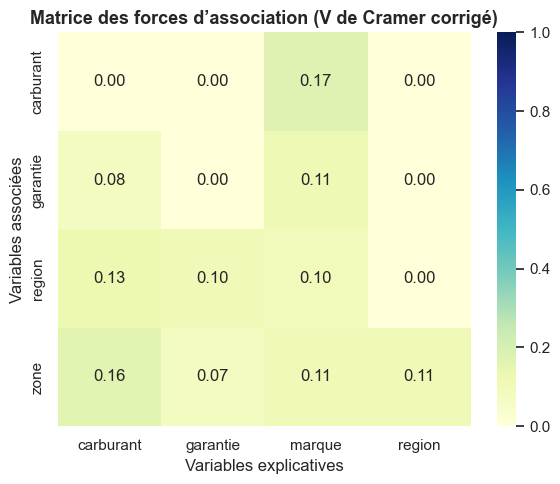

In [18]:
# =========================================================
# 3.3.D – Visualisation globale des associations catégorielles
# =========================================================

import seaborn as sns
import matplotlib.pyplot as plt
import os

# Création du pivot (matrice Var1 x Var2)
pivot = assoc_df.pivot(index="Var1", columns="Var2", values="V_Cramer").fillna(0)

# Figure
plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f", vmin=0, vmax=1)
plt.title("Matrice des forces d’association (V de Cramer corrigé)", fontsize=13, weight="bold")
plt.xlabel("Variables explicatives")
plt.ylabel("Variables associées")
plt.tight_layout()

# Enregistrement + affichage direct
output_path = os.path.join(base_dir, "graphiques", "cat_cat_assoc_matrix.png")
plt.savefig(output_path, dpi=150)
print(f"✅ Matrice sauvegardée dans : {output_path}")

# Affichage dans VS Code
plt.show()


<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:20px;">

<h1 style="color:#FF0000; text-transform:uppercase;
           font-family:'Times New Roman', Times, serif;
           text-align:center; font-size:28px;
           margin-top:10px; margin-bottom:10px;">
  <b>ANALYSE GÉOGRAPHIQUE / RÉGIONALE</b>
</h1>

<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:30px;">


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Barplots par région</b>
  </h2>
</div>


💾 Tableau enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\region\tableaux\prime_pure_par_region_resume.csv

=== Résumé prime_pure par région (trié) ===


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\4189639457.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df.groupby("region", dropna=False)["prime_pure"].agg(


,region,mean,std,n,se,ci95_lo,ci95_hi
0,0,5112.847630,9792.626512,61,1253.817345,2655.365634,7570.329626
1,2,3506.361243,10682.838938,74,1241.854802,1072.325832,5940.396655
2,1,3464.346085,6136.404557,67,749.681135,1994.971060,4933.721110
3,5,3352.146665,7219.649173,112,682.192724,2015.048926,4689.244403
4,6,2622.816609,7759.272675,87,831.881350,992.329164,4253.304055
5,11,2504.844879,9664.266200,60,1247.651402,59.448132,4950.241626
6,4,2262.478609,3879.713448,101,386.045917,1505.828612,3019.128606
7,8,2221.629968,4280.677684,51,599.414771,1046.777017,3396.482918
8,13,2102.276748,5606.783020,1674,137.036426,1833.685354,2370.868143
9,10,2090.296300,3210.189657,69,386.461420,1332.831916,2847.760684


🖼️ Barplot enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\region\graphiques\barplot_prime_pure_par_region_ic95.png


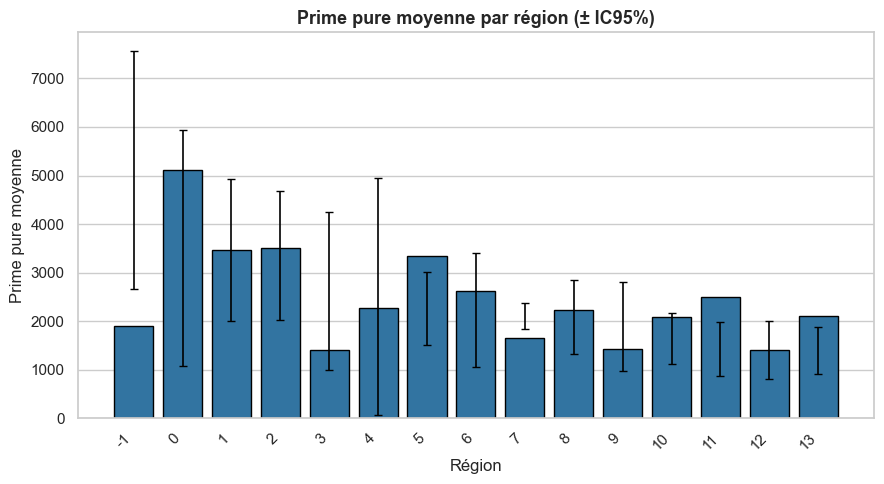

🖼️ Boxplot enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\region\graphiques\boxplot_prime_pure_par_region.png


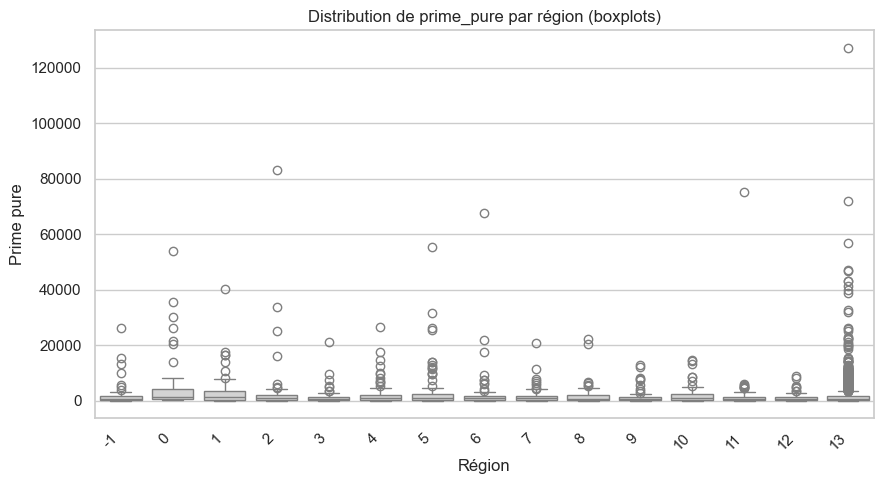


=== Top 5 régions (prime_pure moyenne) ===


,region,mean,std,n,se,ci95_lo,ci95_hi
0,0,5112.847630,9792.626512,61,1253.817345,2655.365634,7570.329626
1,2,3506.361243,10682.838938,74,1241.854802,1072.325832,5940.396655
2,1,3464.346085,6136.404557,67,749.681135,1994.971060,4933.721110
3,5,3352.146665,7219.649173,112,682.192724,2015.048926,4689.244403
4,6,2622.816609,7759.272675,87,831.881350,992.329164,4253.304055



=== Bottom 5 régions (prime_pure moyenne) ===


,region,mean,std,n,se,ci95_lo,ci95_hi
10,-1,1892.913899,3954.865062,72,466.085317,979.386677,2806.441121
11,7,1646.107930,2650.823300,99,266.417766,1123.929109,2168.286751
12,9,1423.421094,2492.353809,76,285.892589,863.071619,1983.770569
13,3,1409.100466,2743.550947,81,304.838994,811.616038,2006.584895
14,12,1399.263044,1873.321529,56,250.333119,908.610130,1889.915957


📝 Log enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\region\logs\resume_4_1.txt
✅ 4.1 terminé — sorties visibles et exportées.


In [19]:
# =========================================================
# 4.1 – Analyse géographique : prime_pure par région (± IC95%)
# Sorties : visibles à l'écran + enregistrées sur disque
# Dossiers : export_geo/region/{tableaux,graphiques,logs}
# =========================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import datetime
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# ---------- 0) Vérifications ----------
required_cols = {"region", "prime_pure"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Colonnes manquantes pour 4.1 : {missing}")

# ---------- 1) Arborescence d’export ----------
base_dir = os.path.join("export_geo", "region")
dirs = {
    "tableaux":   os.path.join(base_dir, "tableaux"),
    "graphiques": os.path.join(base_dir, "graphiques"),
    "logs":       os.path.join(base_dir, "logs"),
}
for p in dirs.values():
    os.makedirs(p, exist_ok=True)

# ---------- 2) Tableau résumé par région ----------
# Statistiques de base
grp = df.groupby("region", dropna=False)["prime_pure"].agg(
    mean="mean", std="std", n="count"
).reset_index()

# IC95% (approx. normale)
grp["se"] = grp["std"] / np.sqrt(grp["n"])
grp["ci95_lo"] = grp["mean"] - 1.96 * grp["se"]
grp["ci95_hi"] = grp["mean"] + 1.96 * grp["se"]

# Classement décroissant par moyenne
grp_sorted = grp.sort_values("mean", ascending=False).reset_index(drop=True)

# Export + affichage
csv_path = os.path.join(dirs["tableaux"], "prime_pure_par_region_resume.csv")
grp_sorted.to_csv(csv_path, index=False, encoding="utf-8-sig")
print(f"💾 Tableau enregistré : {os.path.abspath(csv_path)}")

print("\n=== Résumé prime_pure par région (trié) ===")
display(grp_sorted)

# ---------- 3) Barplot (moyenne ± IC95%) ----------
plt.figure(figsize=(max(8, 0.6*len(grp_sorted)), 5))
ax = sns.barplot(
    data=grp_sorted, x="region", y="mean", color="tab:blue", edgecolor="black"
)
# Barres d'erreur (IC95%)
ax.errorbar(
    x=np.arange(len(grp_sorted)),
    y=grp_sorted["mean"].values,
    yerr=(grp_sorted["mean"] - grp_sorted["ci95_lo"]).values,
    fmt="none", ecolor="black", elinewidth=1.2, capsize=3
)
ax.set_title("Prime pure moyenne par région (± IC95%)", fontsize=13, weight="bold")
ax.set_xlabel("Région")
ax.set_ylabel("Prime pure moyenne")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

png_bar = os.path.join(dirs["graphiques"], "barplot_prime_pure_par_region_ic95.png")
plt.savefig(png_bar, dpi=150)
print(f"🖼️ Barplot enregistré : {os.path.abspath(png_bar)}")
plt.show()

# ---------- 4) (Option visuelle) Boxplot par région ----------
plt.figure(figsize=(max(8, 0.6*df['region'].nunique()), 5))
ax2 = sns.boxplot(data=df, x="region", y="prime_pure", color="lightgray")
ax2.set_title("Distribution de prime_pure par région (boxplots)", fontsize=12)
ax2.set_xlabel("Région")
ax2.set_ylabel("Prime pure")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

png_box = os.path.join(dirs["graphiques"], "boxplot_prime_pure_par_region.png")
plt.savefig(png_box, dpi=150)
print(f"🖼️ Boxplot enregistré : {os.path.abspath(png_box)}")
plt.show()

# ---------- 5) Top/Bottom régions + log ----------
top5 = grp_sorted.head(5).copy()
bot5 = grp_sorted.tail(5).copy()

top_csv = os.path.join(dirs["tableaux"], "top5_regions_prime_pure.csv")
bot_csv = os.path.join(dirs["tableaux"], "bottom5_regions_prime_pure.csv")
top5.to_csv(top_csv, index=False, encoding="utf-8-sig")
bot5.to_csv(bot_csv, index=False, encoding="utf-8-sig")

print("\n=== Top 5 régions (prime_pure moyenne) ===")
display(top5)
print("\n=== Bottom 5 régions (prime_pure moyenne) ===")
display(bot5)

log_path = os.path.join(dirs["logs"], "resume_4_1.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 4.1 – Prime pure par région (± IC95%) ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    f.write(f"Tableau complet : {os.path.abspath(csv_path)}\n")
    f.write(f"Barplot : {os.path.abspath(png_bar)}\n")
    f.write(f"Boxplot : {os.path.abspath(png_box)}\n")
    f.write(f"Top5 : {os.path.abspath(top_csv)}\n")
    f.write(f"Bottom5 : {os.path.abspath(bot_csv)}\n")

print(f"📝 Log enregistré : {os.path.abspath(log_path)}")
print("✅ 4.1 terminé — sorties visibles et exportées.")


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Interactions zone × région (heatmap des moyennes de prime_pure)</b>
  </h2>
</div>


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\4116208781.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_mean = pd.pivot_table(
C:\Users\hp\AppData\Local\Temp\ipykernel_6516\4116208781.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_n = pd.pivot_table(
C:\Users\hp\AppData\Local\Temp\ipykernel_6516\4116208781.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.groupby(["zone","region"])["prime_pure"].agg(["mean","std","count"]).reset_index()


💾 Moyennes exportées : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\tableaux\prime_pure_mean_zone_region.csv
💾 Effectifs exportés : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\tableaux\effectifs_zone_region.csv
💾 Audit complet      : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\tableaux\audit_zone_region_mean_std_ic95.csv

=== Aperçu moyennes prime_pure (zone × region) ===


region,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
zone,,,,,,,,,,,,,,,
A,520.641286,2341.950636,901.361111,2310.704297,1276.857091,1970.981493,1324.528060,1624.358055,1023.520099,1793.310454,2529.986900,1036.834805,1431.199661,713.555104,2242.586470
B,789.788333,8227.620840,2528.195140,4547.672418,612.965096,1199.370845,3071.220481,9109.691406,1381.389226,474.417500,655.610223,3441.028199,788.999700,1710.739937,1543.768131
C,1107.048442,2049.053391,6383.432169,7234.103574,1826.475839,1636.167598,3062.792972,2146.039259,2267.567687,1697.721294,1398.637420,2342.202516,5727.438891,1771.320722,1875.342053
D,1778.029603,3331.722793,3380.046246,3599.477222,1623.959136,3404.735551,3061.661103,1693.477814,2818.977129,2964.788132,946.561404,2635.841231,1277.125269,1412.942333,2538.102947
E,3741.971001,3527.788296,1304.181898,1790.948242,904.746307,1855.897122,5213.056534,2372.393146,1097.581827,2473.545746,1242.482902,1006.555636,2224.744167,1909.278736,1970.387543



=== Aperçu effectifs (zone × region) ===


region,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
zone,,,,,,,,,,,,,,,
A,5,7,3,10,12,14,14,6,20,5,13,11,3,10,307
B,6,11,5,7,6,6,10,8,11,4,12,9,7,9,187
C,21,9,16,15,22,31,40,25,20,12,27,16,17,10,474
D,19,16,25,13,21,24,17,24,17,16,13,19,26,16,346
E,19,11,17,27,18,23,29,20,31,14,7,11,4,7,322


🖼️ Heatmap moyennes enregistrée : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\graphiques\heatmap_zone_region_prime_pure_mean.png


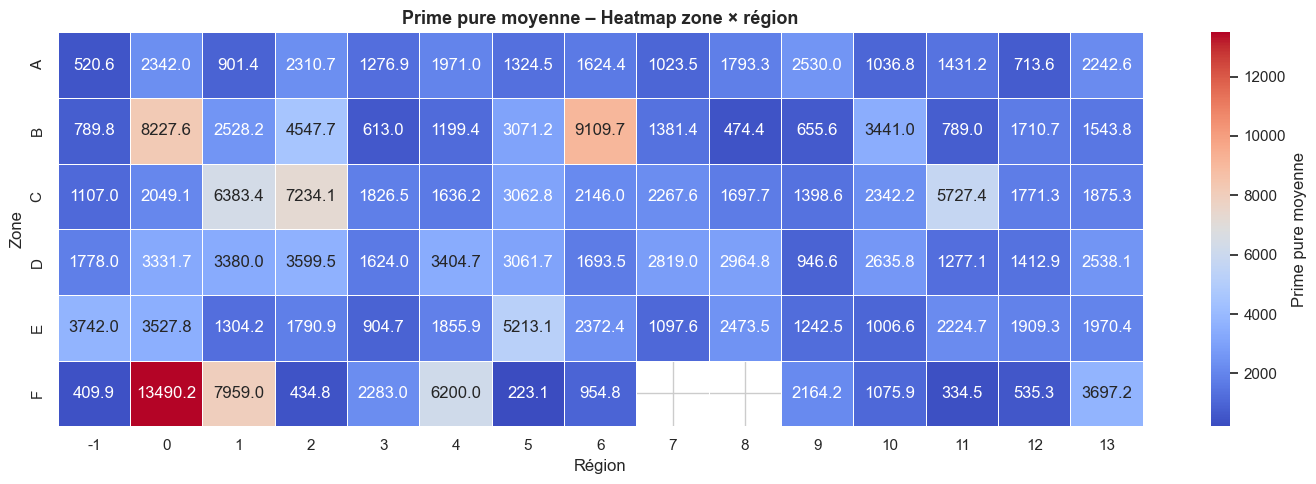

🖼️ Heatmap effectifs enregistrée : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\graphiques\heatmap_zone_region_effectifs.png


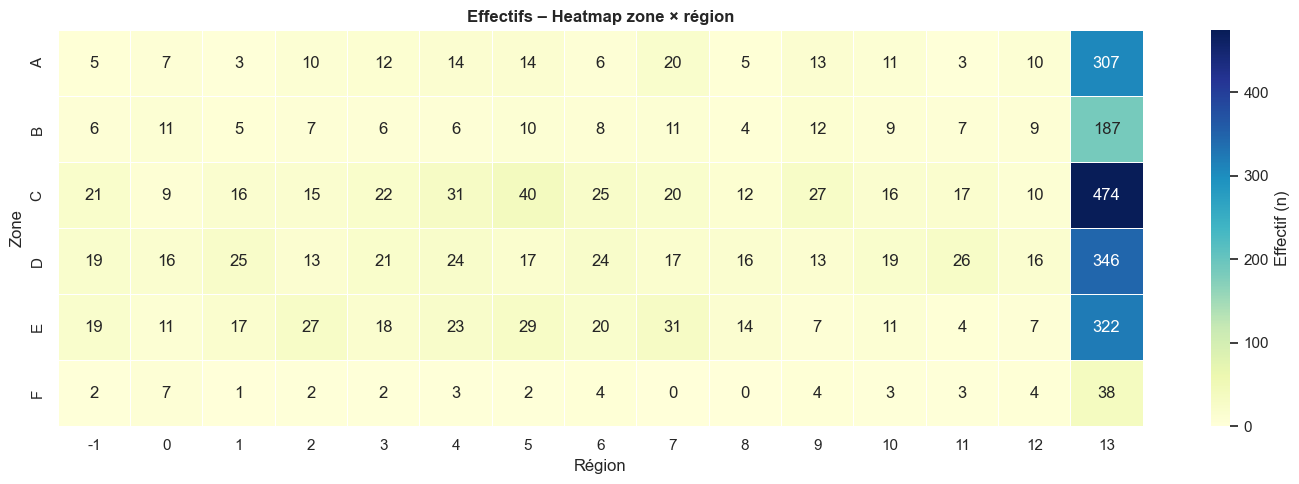

📝 Log enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\zone_region\logs\resume_4_2.txt
✅ 4.2 terminé — sorties visibles et exportées.


In [20]:
# =========================================================
# 4.2 – Interactions zone × region : heatmaps prime_pure moyenne (+ effectifs)
# Dossiers : export_geo/zone_region/{tableaux,graphiques,logs}
# Sorties : visibles à l'écran + enregistrées (CSV/PNG)
# =========================================================
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# ---------- 0) Vérifications ----------
required_cols = {"zone", "region", "prime_pure"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Colonnes manquantes pour 4.2 : {missing}")

# ---------- 1) Arborescence ----------
base_dir = os.path.join("export_geo", "zone_region")
dirs = {
    "tableaux":   os.path.join(base_dir, "tableaux"),
    "graphiques": os.path.join(base_dir, "graphiques"),
    "logs":       os.path.join(base_dir, "logs"),
}
for p in dirs.values():
    os.makedirs(p, exist_ok=True)

# ---------- 2) Tableaux croisés ----------
# Moyenne de prime_pure par (zone, region)
pivot_mean = pd.pivot_table(
    df, index="zone", columns="region", values="prime_pure",
    aggfunc="mean", dropna=False
)

# Effectifs par croisement (pour lire la fiabilité des moyennes)
pivot_n = pd.pivot_table(
    df, index="zone", columns="region", values="prime_pure",
    aggfunc="count", dropna=False
).fillna(0).astype(int)

# (Option) Écart-type et IC95% moyens par cellule si besoin d'audit
# (non tracé mais exporté)
tmp = df.groupby(["zone","region"])["prime_pure"].agg(["mean","std","count"]).reset_index()
tmp["se"] = tmp["std"] / np.sqrt(tmp["count"].replace(0, np.nan))
tmp["ci95_lo"] = tmp["mean"] - 1.96 * tmp["se"]
tmp["ci95_hi"] = tmp["mean"] + 1.96 * tmp["se"]

# Exports CSV
csv_mean = os.path.join(dirs["tableaux"], "prime_pure_mean_zone_region.csv")
csv_n    = os.path.join(dirs["tableaux"], "effectifs_zone_region.csv")
csv_audit= os.path.join(dirs["tableaux"], "audit_zone_region_mean_std_ic95.csv")

pivot_mean.to_csv(csv_mean, encoding="utf-8-sig")
pivot_n.to_csv(csv_n, encoding="utf-8-sig")
tmp.to_csv(csv_audit, index=False, encoding="utf-8-sig")

print(f"💾 Moyennes exportées : {os.path.abspath(csv_mean)}")
print(f"💾 Effectifs exportés : {os.path.abspath(csv_n)}")
print(f"💾 Audit complet      : {os.path.abspath(csv_audit)}")

# Affichage rapide dans VS Code
print("\n=== Aperçu moyennes prime_pure (zone × region) ===")
display(pivot_mean.head())
print("\n=== Aperçu effectifs (zone × region) ===")
display(pivot_n.head())

# ---------- 3) Heatmap des moyennes ----------
plt.figure(figsize=(max(7, 0.8 * (pivot_mean.shape[1] + 3)),
                    max(5, 0.6 * (pivot_mean.shape[0] + 2))))
ax = sns.heatmap(
    pivot_mean, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5,
    cbar_kws={"label": "Prime pure moyenne"}
)
ax.set_title("Prime pure moyenne – Heatmap zone × région", fontsize=13, weight="bold")
ax.set_xlabel("Région"); ax.set_ylabel("Zone")
plt.tight_layout()

png_mean = os.path.join(dirs["graphiques"], "heatmap_zone_region_prime_pure_mean.png")
plt.savefig(png_mean, dpi=160)
print(f"🖼️ Heatmap moyennes enregistrée : {os.path.abspath(png_mean)}")
plt.show()

# ---------- 4) Heatmap des effectifs (fiabilité des cellules) ----------
plt.figure(figsize=(max(7, 0.8 * (pivot_n.shape[1] + 3)),
                    max(5, 0.6 * (pivot_n.shape[0] + 2))))
ax2 = sns.heatmap(
    pivot_n, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5,
    cbar_kws={"label": "Effectif (n)"}
)
ax2.set_title("Effectifs – Heatmap zone × région", fontsize=12, weight="bold")
ax2.set_xlabel("Région"); ax2.set_ylabel("Zone")
plt.tight_layout()

png_n = os.path.join(dirs["graphiques"], "heatmap_zone_region_effectifs.png")
plt.savefig(png_n, dpi=160)
print(f"🖼️ Heatmap effectifs enregistrée : {os.path.abspath(png_n)}")
plt.show()

# ---------- 5) Log synthèse ----------
log_path = os.path.join(dirs["logs"], "resume_4_2.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 4.2 – Interactions zone × region ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    f.write(f"Moyennes : {os.path.abspath(csv_mean)}\n")
    f.write(f"Effectifs : {os.path.abspath(csv_n)}\n")
    f.write(f"Audit    : {os.path.abspath(csv_audit)}\n")
    f.write(f"Heatmap moyennes : {os.path.abspath(png_mean)}\n")
    f.write(f"Heatmap effectifs: {os.path.abspath(png_n)}\n")

print(f"📝 Log enregistré : {os.path.abspath(log_path)}")
print("✅ 4.2 terminé — sorties visibles et exportées.")


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : (tests ANOVA/Kruskal par région + post-hoc)</b>
  </h2>
</div>


In [21]:
# =========================================================
# 4.3 – Tests statistiques sur prime_pure par région
# Objectif : valider les différences observées entre régions
# Dossiers : export_geo/tests_region/{tableaux,logs}
# Sorties : visibles + exportées
# =========================================================
import os
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, kruskal, levene, shapiro
import scikit_posthocs as sp
from datetime import datetime
from IPython.display import display

# ---------- 0) Vérifications ----------
required_cols = {"region", "prime_pure"}
missing = required_cols - set(df.columns)
if missing:
    raise ValueError(f"Colonnes manquantes pour 4.3 : {missing}")

# ---------- 1) Dossiers ----------
base_dir = os.path.join("export_geo", "tests_region")
dirs = {
    "tableaux": os.path.join(base_dir, "tableaux"),
    "logs": os.path.join(base_dir, "logs")
}
for p in dirs.values():
    os.makedirs(p, exist_ok=True)

# ---------- 2) Préparation des données ----------
groups = [g["prime_pure"].dropna().values for _, g in df.groupby("region")]
regions = list(df["region"].dropna().unique())

# ---------- 3) Vérification des conditions ----------
# Normalité (Shapiro sur échantillons ≤ 5000)
normality_results = []
for reg, vals in zip(regions, groups):
    sample = vals if len(vals) <= 5000 else np.random.choice(vals, 5000, replace=False)
    stat, p = shapiro(sample)
    normality_results.append({"region": reg, "p_shapiro": p})

normality_df = pd.DataFrame(normality_results)
homog_stat, homog_p = levene(*groups)

# ---------- 4) Choix du test global ----------
normal = (normality_df["p_shapiro"] > 0.05).all()
homog = homog_p > 0.05

if normal and homog:
    test_name = "ANOVA (paramétrique)"
    stat, p_global = f_oneway(*groups)
else:
    test_name = "Kruskal–Wallis (non paramétrique)"
    stat, p_global = kruskal(*groups)

summary_global = pd.DataFrame([{
    "Test global": test_name,
    "Statistique": stat,
    "p-value": p_global,
    "Homogénéité Levene_p": homog_p,
    "Normalité_globale": normal
}])

print("=== Résultat global du test ===")
display(summary_global)

# ---------- 5) Test post-hoc si significatif ----------
if p_global < 0.05:
    print(f"\n🔎 Test global significatif (p={p_global:.4f}) → comparaison post-hoc (Dunn)")
    posthoc = sp.posthoc_dunn(df, val_col="prime_pure", group_col="region", p_adjust="bonferroni")
    posthoc_rounded = posthoc.round(4)
    display(posthoc_rounded)
    csv_posthoc = os.path.join(dirs["tableaux"], "posthoc_dunn_regions.csv")
    posthoc_rounded.to_csv(csv_posthoc, encoding="utf-8-sig")
else:
    posthoc_rounded = None
    print("\n❎ Pas de différence significative entre les régions (p≥0.05).")

# ---------- 6) Exports ----------
csv_global = os.path.join(dirs["tableaux"], "test_global_region.csv")
normality_csv = os.path.join(dirs["tableaux"], "normality_region_shapiro.csv")

summary_global.to_csv(csv_global, index=False, encoding="utf-8-sig")
normality_df.to_csv(normality_csv, index=False, encoding="utf-8-sig")

# ---------- 7) Log ----------
log_path = os.path.join(dirs["logs"], "resume_4_3.txt")
with open(log_path, "w", encoding="utf-8") as f:
    f.write("=== 4.3 – Tests statistiques par région ===\n")
    f.write(f"Date : {datetime.now()}\n\n")
    f.write(f"Test global : {test_name}\n")
    f.write(f"Statistique = {stat:.4f} | p-value = {p_global:.4e}\n")
    f.write(f"Homogénéité (Levene_p) = {homog_p:.4f}\n")
    f.write(f"Normalité globale = {normal}\n\n")
    if posthoc_rounded is not None:
        f.write(f"Post-hoc Dunn : {os.path.abspath(csv_posthoc)}\n")
    else:
        f.write("Pas de test post-hoc (p_global ≥ 0.05)\n")

print(f"\n📝 Log enregistré : {os.path.abspath(log_path)}")
print("✅ 4.3 terminé — résultats affichés et exportés.")


=== Résultat global du test ===


C:\Users\hp\AppData\Local\Temp\ipykernel_6516\1357431765.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g["prime_pure"].dropna().values for _, g in df.groupby("region")]


,Test global,Statistique,p-value,Homogénéité Levene_p,Normalité_globale
0,Kruskal–Wallis (non paramétrique),46.258132,0.000025,0.014429,False



🔎 Test global significatif (p=0.0000) → comparaison post-hoc (Dunn)


c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\scikit_posthocs\_posthocs.py:357: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\scikit_posthocs\_posthocs.py:360: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)['ranks'].mean()


,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
-1,1.0000,0.3406,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
0,0.3406,1.0000,1.0000,1.0000,0.0105,1.0,1.0000,1.0,1.0,0.6211,0.0076,1.0,0.1067,0.6614,0.0165
1,1.0000,1.0000,1.0000,1.0000,0.1592,1.0,1.0000,1.0,1.0,1.0000,0.1165,1.0,0.9871,1.0000,0.4392
2,1.0000,1.0000,1.0000,1.0000,0.8880,1.0,1.0000,1.0,1.0,1.0000,0.6604,1.0,1.0000,1.0000,1.0000
3,1.0000,0.0105,0.1592,0.8880,1.0000,1.0,0.2128,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,0.2128,1.0,1.0000,1.0,1.0,1.0000,0.1535,1.0,1.0000,1.0000,0.3893
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
8,1.0000,0.6211,1.0000,1.0000,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000



📝 Log enregistré : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_geo\tests_region\logs\resume_4_3.txt
✅ 4.3 terminé — résultats affichés et exportés.


<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:20px;">

<h1 style="color:#FF0000; text-transform:uppercase;
           font-family:'Times New Roman', Times, serif;
           text-align:center; font-size:28px;
           margin-top:10px; margin-bottom:10px;">
  <b>ANALYSE MULTIVARIÉE</b>
</h1>

<hr style="border:1px solid #FFD700; margin-top:20px; margin-bottom:30px;">


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4;
           white-space:normal; word-wrap:break-word;">
  <b>Phase 1 : Modélisation linéaire multiple (OLS classique)</b>
</h3>


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Préparation & dossiers</b>
  </h2>
</div>

In [22]:
# ===== 5.0 — Préparation & dossiers =====
import os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# ❶ Cible & prédicteurs
TARGET = "prime_pure"
PREDICTORS = ["bonus","ageconducteur","agevehicule","puissance","densite"]

# ❷ Vérifs
assert 'df' in globals(), "Charge d'abord Actuar0.csv dans df."
missing = set([TARGET]+PREDICTORS) - set(df.columns)
if missing: raise ValueError(f"Colonnes manquantes: {missing}")

# ❸ Arborescence export
BASE, STAGE = "export_multivarie", "01_ols"
DIR = {
    "base": os.path.join(BASE, STAGE),
    "tab":  os.path.join(BASE, STAGE, "tableaux"),
    "fig":  os.path.join(BASE, STAGE, "graphiques"),
    "log":  os.path.join(BASE, STAGE, "logs"),
}
for p in DIR.values(): os.makedirs(p, exist_ok=True)

# ❹ Jeu propre (numériques, sans NA)
work = df[[TARGET]+PREDICTORS].copy()
for c in [TARGET]+PREDICTORS:
    work[c] = pd.to_numeric(work[c], errors="coerce")
work = work.dropna().reset_index(drop=True)

y = work[TARGET].values
X = sm.add_constant(work[PREDICTORS])

print(f"✅ Base prête: {work.shape[0]} obs., {len(PREDICTORS)} X.")
display(work.head())


✅ Base prête: 2740 obs., 5 X.


,prime_pure,bonus,ageconducteur,agevehicule,puissance,densite
0,388.945946,64,31,4,5,21
1,1760.111111,100,22,8,7,26
2,1432.958333,61,32,0,9,41
3,357.925926,100,39,5,7,11
4,138.980392,50,49,0,4,31


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Visualisations (corrélations + nuages Y~X)</b>
  </h2>
</div>


,bonus,ageconducteur,agevehicule,puissance,densite
bonus,1.00,-0.44,0.04,-0.06,-0.06
ageconducteur,-0.44,1.00,0.03,0.03,0.06
agevehicule,0.04,0.03,1.00,0.02,-0.03
puissance,-0.06,0.03,0.02,1.00,0.01
densite,-0.06,0.06,-0.03,0.01,1.00


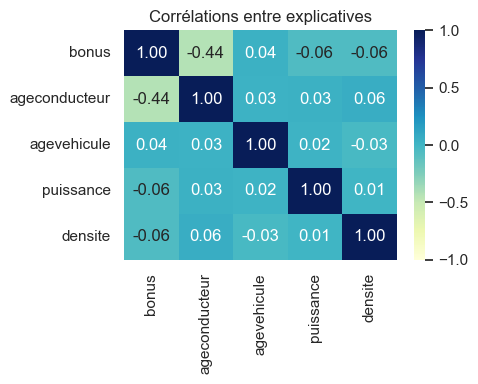

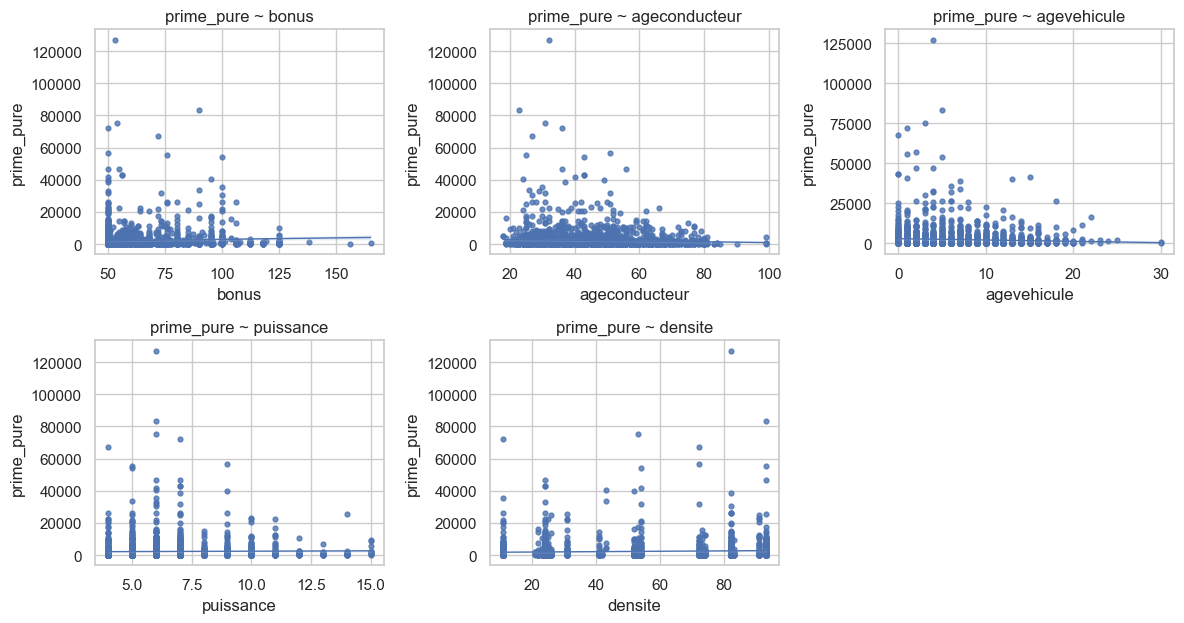

🖼️ Graphiques → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\01_ols\graphiques


In [23]:
# ===== 5.1 — VISUALISATIONS =====
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, os

# (A) Corrélations entre explicatives
corr = work[PREDICTORS].corr()
display(corr.round(2))

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Corrélations entre explicatives")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "corr_explicatives.png"), dpi=150)
plt.show()

# (B) Nuages Y~X (avec droite OLS simple)
ncols = 3
nrows = int(np.ceil(len(PREDICTORS)/ncols))
plt.figure(figsize=(4*ncols, 3.2*nrows))
for i, col in enumerate(PREDICTORS, 1):
    plt.subplot(nrows, ncols, i)
    sns.regplot(x=work[col], y=work[TARGET], scatter_kws={"s":12}, line_kws={"lw":1})
    plt.xlabel(col); plt.ylabel(TARGET); plt.title(f"{TARGET} ~ {col}")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "scatter_target_vs_X.png"), dpi=150)
plt.show()

print("🖼️ Graphiques →", os.path.abspath(DIR["fig"]))


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Modélisation (OLS)</b>
  </h2>
</div>

In [24]:
# ===== 5.2 — MODÉLISATION (OLS) =====
import pandas as pd, os
import statsmodels.api as sm
from IPython.display import display

ols = sm.OLS(y, X).fit()

print("=== OLS – Résumé ===")
print(ols.summary())

# Résumé texte
with open(os.path.join(DIR["tab"], "ols_summary.txt"), "w", encoding="utf-8") as f:
    f.write(str(ols.summary()))

# Coefficients tabulaires
coefs = pd.DataFrame({
    "variable": ols.params.index,
    "coef": ols.params.values,
    "std_err": ols.bse.values,
    "t": ols.tvalues.values,
    "p_value": ols.pvalues.values
})
display(coefs)
coefs.to_csv(os.path.join(DIR["tab"], "coefficients_ols.csv"), index=False, encoding="utf-8-sig")

# Métriques globales
glob = pd.DataFrame([{
    "R2": ols.rsquared, "R2_adj": ols.rsquared_adj,
    "AIC": ols.aic, "BIC": ols.bic,
    "F_stat": ols.fvalue, "F_p": ols.f_pvalue
}])
display(glob)
glob.to_csv(os.path.join(DIR["tab"], "metriques_globales.csv"), index=False, encoding="utf-8-sig")


=== OLS – Résumé ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.846
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           2.34e-06
Time:                        14:43:15   Log-Likelihood:                -27626.
No. Observations:                2740   AIC:                         5.526e+04
Df Residuals:                    2734   BIC:                         5.530e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1666.6214 

,variable,coef,std_err,t,p_value
0,const,1666.621429,848.839231,1.963412,0.049699
1,bonus,14.012812,7.416589,1.889388,0.058946
2,ageconducteur,-17.246075,8.833106,-1.952436,0.050988
3,agevehicule,-81.247148,23.561534,-3.448296,0.000573
4,puissance,60.829961,58.315855,1.043112,0.296989
5,densite,12.299508,3.988245,3.083939,0.002063


,R2,R2_adj,AIC,BIC,F_stat,F_p
0,0.012366,0.01056,55263.339079,55298.833359,6.846377,0.000002


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 4 : Diagnostics (VIF + tests + graphes) avec verdicts & actions</b>
  </h2>
</div>

,Variable,VIF
0,bonus,1.241807
1,ageconducteur,1.238785
4,densite,1.005563
2,agevehicule,1.005541
3,puissance,1.004276


✅ VIF OK


,BP_p,JB_p,Shapiro_p,Durbin_Watson
0,0.023711,0.0,0.0,1.765069


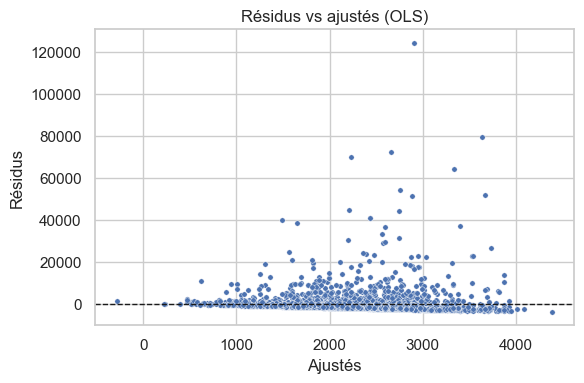

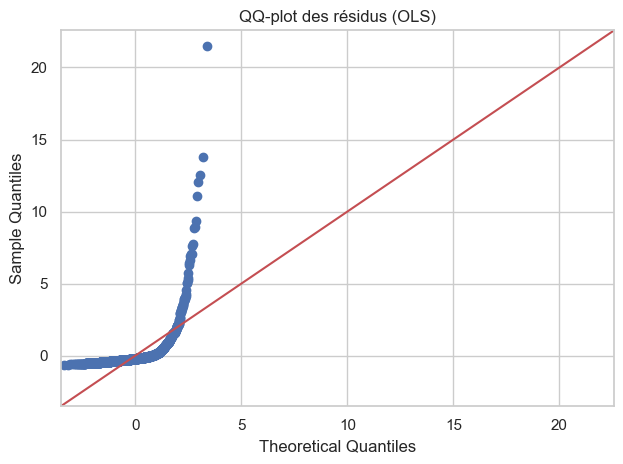

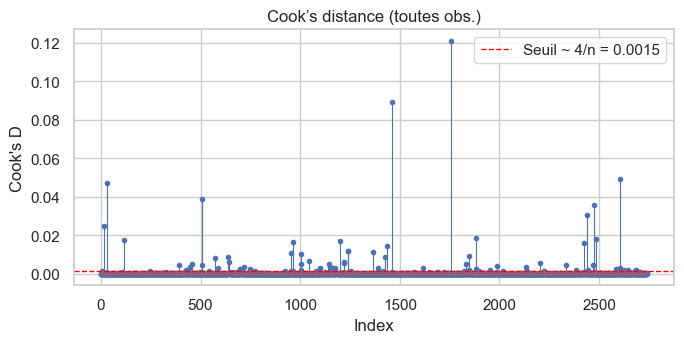

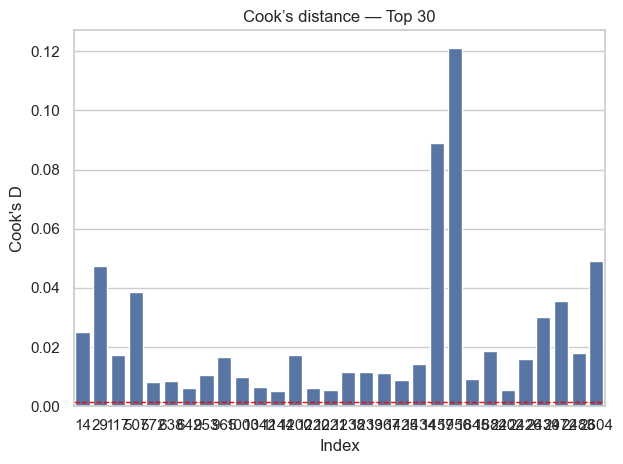

⚠️ Hétéroscédasticité (BP p=0.0237) → SE OLS non fiables.
👉 Utiliser OLS_HC3 et/ou WLS (poids=exposition).
ℹ️ Normalité imparfaite (JB p=0, Shapiro p=0).
👉 Interpréter surtout les signes; envisager log(Y) ou GLM (Gamma/Tweedie).
✅ Pas d’autocorrélation suspecte (DW≈1.77).
💾 Exports → tableaux/ & graphiques/ & logs/ dans: c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\01_ols


In [25]:
# ===== 5.3 — DIAGNOSTICS =====
import numpy as np, pandas as pd, os, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import shapiro
from IPython.display import display

# (A) VIF — Multicolinéarité
X_vif = sm.add_constant(work[PREDICTORS])
vif = pd.DataFrame({
    "Variable": PREDICTORS,
    "VIF": [variance_inflation_factor(X_vif.values, i+1) for i in range(len(PREDICTORS))]
}).sort_values("VIF", ascending=False)
vif.to_csv(os.path.join(DIR["tab"], "vif.csv"), index=False, encoding="utf-8-sig")
display(vif)

high_vif = vif[vif["VIF"]>=10]; mod_vif = vif[(vif["VIF"]>=5)&(vif["VIF"]<10)]
print("✅ VIF OK" if (len(high_vif)==0 and len(mod_vif)==0) else
      ("⚠️ VIF sévère: "+", ".join(high_vif["Variable"]) if len(high_vif)
       else "ℹ️ VIF modéré: "+", ".join(mod_vif["Variable"])))

# (B) Tests sur résidus (OLS)
resid, fitted = ols.resid, ols.fittedvalues

bp_stat, bp_p, _, _ = het_breuschpagan(resid, ols.model.exog)     # Hétéroscédasticité
jb_stat, jb_p, _, _ = jarque_bera(resid)                          # Normalité (JB)
sh_p = shapiro(resid if len(resid)<=5000 else np.random.choice(resid, 5000, replace=False))[1]  # Shapiro
dw = sm.stats.durbin_watson(resid)                                # Autocorr (indicatif)

diag = pd.DataFrame([{"BP_p":bp_p, "JB_p":jb_p, "Shapiro_p":sh_p, "Durbin_Watson":dw}])
diag.to_csv(os.path.join(DIR["tab"], "diagnostics_tests.csv"), index=False, encoding="utf-8-sig")
display(diag)

# (C) Graphes de diagnostic
# 1) Résidus vs ajustés
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=resid, s=15)
plt.axhline(0, ls="--", c="k", lw=1)
plt.title("Résidus vs ajustés (OLS)"); plt.xlabel("Ajustés"); plt.ylabel("Résidus")
plt.tight_layout(); plt.savefig(os.path.join(DIR["fig"], "diag_residus_vs_ajustes.png"), dpi=150); plt.show()

# 2) QQ-plot
fig = sm.qqplot(resid, line="45", fit=True)
plt.title("QQ-plot des résidus (OLS)")
plt.tight_layout(); plt.savefig(os.path.join(DIR["fig"], "diag_qqplot.png"), dpi=150); plt.show()

# 3) Cook’s distance
infl = OLSInfluence(ols)
cooks = infl.cooks_distance[0]
n = len(cooks); idx = np.arange(n); thr = 4/n
plt.figure(figsize=(7,3.6))
markerline, stemlines, baseline = plt.stem(idx, cooks)  # compatible Matplotlib 3.10+
plt.setp(stemlines, linewidth=0.8); plt.setp(markerline, markersize=3)
plt.axhline(thr, color="red", ls="--", lw=1, label=f"Seuil ~ 4/n = {thr:.4f}")
plt.title("Cook’s distance (toutes obs.)"); plt.xlabel("Index"); plt.ylabel("Cook's D"); plt.legend()
plt.tight_layout(); plt.savefig(os.path.join(DIR["fig"], "diag_cooks_distance.png"), dpi=150); plt.show()

top_k = min(30, n)
top_df = pd.DataFrame({"index": idx, "cooks_d": cooks}).sort_values("cooks_d", ascending=False).head(top_k)
sns.barplot(data=top_df, x="index", y="cooks_d"); plt.axhline(thr, color="red", ls="--", lw=1)
plt.title(f"Cook’s distance — Top {top_k}"); plt.xlabel("Index"); plt.ylabel("Cook's D")
plt.tight_layout(); plt.savefig(os.path.join(DIR["fig"], "diag_cooks_top30.png"), dpi=150); plt.show()
top_df.to_csv(os.path.join(DIR["tab"], "influences_top30.csv"), index=False, encoding="utf-8-sig")

# (D) Conclusion — prochaine étape
verdicts = []
if bp_p < 0.05:
    verdicts += [f"⚠️ Hétéroscédasticité (BP p={bp_p:.3g}) → SE OLS non fiables.",
                 "👉 Utiliser OLS_HC3 et/ou WLS (poids=exposition)."]
else:
    verdicts += [f"✅ Pas d’hétéroscédasticité (BP p={bp_p:.3g})."]

if (jb_p < 0.05) or (sh_p < 0.05):
    verdicts += [f"ℹ️ Normalité imparfaite (JB p={jb_p:.3g}, Shapiro p={sh_p:.3g}).",
                 "👉 Interpréter surtout les signes; envisager log(Y) ou GLM (Gamma/Tweedie)."]
else:
    verdicts += [f"✅ Normalité résiduelle plausible (JB p={jb_p:.3g}, Shapiro p={sh_p:.3g})."]

if dw < 1.5 or dw > 2.5:
    verdicts += [f"ℹ️ Durbin–Watson={dw:.2f} (autocorr possible).",
                 "👉 Vérifier dépendances temporelles/cluster; SE robustes cluster si besoin."]
else:
    verdicts += [f"✅ Pas d’autocorrélation suspecte (DW≈{dw:.2f})."]

with open(os.path.join(DIR["log"], "conclusion_diagnostics.txt"), "w", encoding="utf-8") as f:
    f.write("\n".join(verdicts))

print("\n".join(verdicts))
print("💾 Exports → tableaux/ & graphiques/ & logs/ dans:", os.path.abspath(DIR["base"]))


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4;
           white-space:normal; word-wrap:break-word;">
  <b>Phase 2 : Ajustement OLS robuste (HC3)</b>
</h3>


<div style="text-align:center;">
  <h2 style="color:white; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Préparation et configuration du modèle HC3</b>
  </h2>
</div>

In [26]:
# ===== 5.4.1 — Préparation & structure HC3 =====
import os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display

# --- 1️⃣ Dossiers spécialisés pour cette version HC3
BASE = "export_multivarie"
STAGE = "02_hc3"
DIR = {
    "tab": os.path.join(BASE, STAGE, "tableaux"),
    "fig": os.path.join(BASE, STAGE, "graphiques"),
    "log": os.path.join(BASE, STAGE, "logs")
}
for p in DIR.values(): os.makedirs(p, exist_ok=True)

# --- 2️⃣ Données
TARGET = "prime_pure"
PREDICTORS = ["bonus", "ageconducteur", "agevehicule", "puissance", "densite"]

work = df[[TARGET]+PREDICTORS].dropna().copy()
y = work[TARGET].astype(float).values
X = sm.add_constant(work[PREDICTORS].astype(float))

print(f"✅ Données prêtes : {len(work)} obs., {len(PREDICTORS)} X explicatives.")
display(work.head())


✅ Données prêtes : 2740 obs., 5 X explicatives.


,prime_pure,bonus,ageconducteur,agevehicule,puissance,densite
0,388.945946,64,31,4,5,21
1,1760.111111,100,22,8,7,26
2,1432.958333,61,32,0,9,41
3,357.925926,100,39,5,7,11
4,138.980392,50,49,0,4,31


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Estimation du modèle HC3</b>
  </h2>
</div>

In [27]:
# ===== 5.4.2 — Estimation du modèle HC3 =====
ols_hc3 = sm.OLS(y, X).fit(cov_type="HC3")

print("=== RÉSUMÉ OLS (HC3 robust SE) ===")
print(ols_hc3.summary())

# Sauvegarde du résumé complet
summary_path = os.path.join(DIR["tab"], "ols_hc3_summary.txt")
with open(summary_path, "w", encoding="utf-8") as f:
    f.write(str(ols_hc3.summary()))
print(f"💾 Résumé exporté : {summary_path}")


=== RÉSUMÉ OLS (HC3 robust SE) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.251
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           8.97e-06
Time:                        14:43:20   Log-Likelihood:                -27626.
No. Observations:                2740   AIC:                         5.526e+04
Df Residuals:                    2734   BIC:                         5.530e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const      

<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Tableaux des coefficients et métriques</b>
  </h2>
</div>

In [28]:
# ===== 5.4.3 — Coefficients & métriques globales =====
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Coefficients
coefs = pd.DataFrame({
    "Variable": ols_hc3.params.index,
    "Coef": ols_hc3.params.values,
    "StdErr_HC3": ols_hc3.bse.values,
    "t_HC3": ols_hc3.tvalues.values,
    "p_HC3": ols_hc3.pvalues.values
})
display(coefs)
coefs.to_csv(os.path.join(DIR["tab"], "coefficients_ols_hc3.csv"), index=False, encoding="utf-8-sig")

# Métriques de performance
y_pred = ols_hc3.predict(X)
R2 = r2_score(y, y_pred)
RMSE = np.sqrt(mean_squared_error(y, y_pred))
MAE = mean_absolute_error(y, y_pred)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100

metrics = pd.DataFrame([{
    "R2": R2, "RMSE": RMSE, "MAE": MAE, "MAPE_%": MAPE
}])
display(metrics)
metrics.to_csv(os.path.join(DIR["tab"], "metrics_ols_hc3.csv"), index=False, encoding="utf-8-sig")


,Variable,Coef,StdErr_HC3,t_HC3,p_HC3
0,const,1666.621429,838.470702,1.987692,0.046846
1,bonus,14.012812,7.949883,1.762644,0.077961
2,ageconducteur,-17.246075,8.244897,-2.091727,0.036463
3,agevehicule,-81.247148,20.618240,-3.940547,0.000081
4,puissance,60.829961,47.090184,1.291776,0.196435
5,densite,12.299508,4.392063,2.800394,0.005104


,R2,RMSE,MAE,MAPE_%
0,0.012366,5787.30852,2436.194497,554.010045


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 4 : Visualisation des ajustements et résidus</b>
  </h2>
</div>

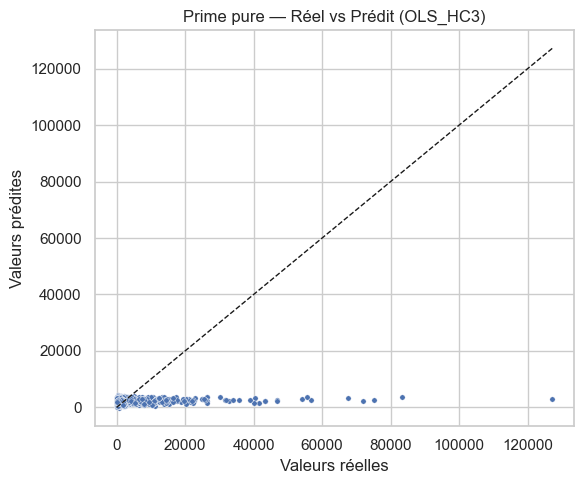

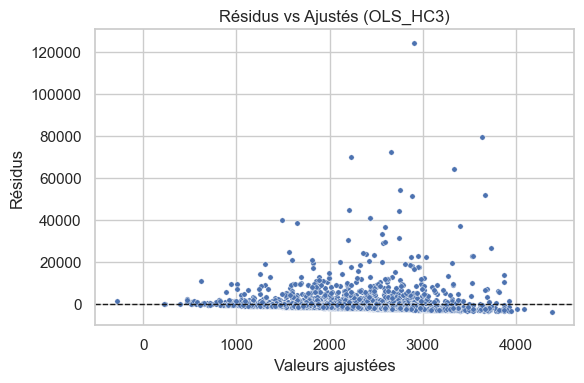

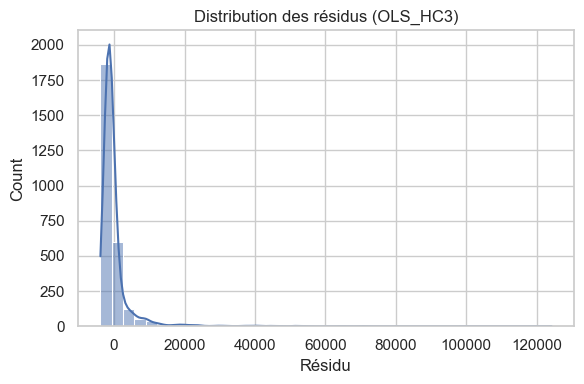

In [29]:
# ===== 5.4.4 — Visualisations HC3 =====
sns.set_theme(style="whitegrid")

# 1️⃣ Réel vs Prédit
plt.figure(figsize=(6,5))
sns.scatterplot(x=y, y=y_pred, s=15)
plt.plot([min(y), max(y)], [min(y), max(y)], "k--", lw=1)
plt.title("Prime pure — Réel vs Prédit (OLS_HC3)")
plt.xlabel("Valeurs réelles"); plt.ylabel("Valeurs prédites")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "reel_vs_predit.png"), dpi=150)
plt.show()

# 2️⃣ Résidus vs Ajustés
resid = y - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=resid, s=15)
plt.axhline(0, ls="--", c="k", lw=1)
plt.title("Résidus vs Ajustés (OLS_HC3)")
plt.xlabel("Valeurs ajustées"); plt.ylabel("Résidus")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "residus_vs_ajustes.png"), dpi=150)
plt.show()

# 3️⃣ Distribution des résidus
plt.figure(figsize=(6,4))
sns.histplot(resid, bins=40, kde=True)
plt.title("Distribution des résidus (OLS_HC3)")
plt.xlabel("Résidu")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "residus_hist.png"), dpi=150)
plt.show()


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 5 : Verdict synthétique et export</b>
  </h2>
</div>

In [30]:
# ===== 5.4.5 — Verdict final HC3 =====
verdict = (
    f"OLS_HC3 — n={len(work)} observations\n"
    f"R²={R2:.3f} | RMSE={RMSE:.4f} | MAE={MAE:.4f} | MAPE={MAPE:.2f}%\n"
    "➡️ HC3 corrige les erreurs standards sans modifier les coefficients ni les prédictions.\n"
    "✅ Les p-values sont désormais robustes à l’hétéroscédasticité.\n"
    "🧩 Prochaine étape : WLS (pondération par exposition) pour tarification/prédiction."
)
with open(os.path.join(DIR["log"], "verdict_hc3.txt"), "w", encoding="utf-8") as f:
    f.write(verdict)
print(verdict)


OLS_HC3 — n=2740 observations
R²=0.012 | RMSE=5787.3085 | MAE=2436.1945 | MAPE=554.01%
➡️ HC3 corrige les erreurs standards sans modifier les coefficients ni les prédictions.
✅ Les p-values sont désormais robustes à l’hétéroscédasticité.
🧩 Prochaine étape : WLS (pondération par exposition) pour tarification/prédiction.


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4;
           white-space:normal; word-wrap:break-word;">
  <b>Phase 3 : Modélisation pondérée (WLS) / Weighted Least Squares (pondéré par l’exposition)</b>
</h3>


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Préparation & dossiers</b>
  </h2>
</div>

In [31]:
# ===== 5.5.1 — Préparation & dossiers (WLS) =====
import os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# Dossiers d'export
BASE, STAGE = "export_multivarie", "03_wls"
DIR = {
    "base": os.path.join(BASE, STAGE),
    "tab":  os.path.join(BASE, STAGE, "tableaux"),
    "fig":  os.path.join(BASE, STAGE, "graphiques"),
    "log":  os.path.join(BASE, STAGE, "logs"),
}
for p in DIR.values(): os.makedirs(p, exist_ok=True)

# Variables
TARGET = "prime_pure"
PREDICTORS = ["bonus","ageconducteur","agevehicule","puissance","densite"]
WEIGHT_COL = "exposition"   # ← poids métier standard en tarification

# Vérifs colonnes
need = set([TARGET, WEIGHT_COL] + PREDICTORS) - set(df.columns)
if need: raise ValueError(f"Colonnes manquantes pour WLS: {need}")

# Jeu propre
work = df[[TARGET, WEIGHT_COL] + PREDICTORS].copy()
for c in [TARGET, WEIGHT_COL] + PREDICTORS:
    work[c] = pd.to_numeric(work[c], errors="coerce")
work = work.dropna().reset_index(drop=True)

# Poids WLS (rappel: WLS attend des poids ∝ 1/Var[erreur]; en pratique en assurance
# pour une variable ramenée à l'exposition, on utilise poids = exposition)
w = work[WEIGHT_COL].clip(lower=1e-6).values.astype(float)  # évite les 0
y = work[TARGET].values.astype(float)
X = sm.add_constant(work[PREDICTORS].astype(float))

print(f"✅ WLS — base prête: n={len(work)}, X={len(PREDICTORS)}, poids='{WEIGHT_COL}'")
display(work.head())


✅ WLS — base prête: n=2740, X=5, poids='exposition'


,prime_pure,exposition,bonus,ageconducteur,agevehicule,puissance,densite
0,388.945946,0.74,64,31,4,5,21
1,1760.111111,0.18,100,22,8,7,26
2,1432.958333,0.48,61,32,0,9,41
3,357.925926,0.27,100,39,5,7,11
4,138.980392,0.51,50,49,0,4,31


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Estimation WLS (poids = exposition) + exports</b>
  </h2>
</div>

In [32]:
# ===== 5.5.2 — Estimation WLS (poids = exposition) =====
wls = sm.WLS(y, X, weights=w).fit()

print("=== Résumé WLS (poids = exposition) ===")
print(wls.summary())

# Export résumé texte
with open(os.path.join(DIR["tab"], "wls_summary.txt"), "w", encoding="utf-8") as f:
    f.write(str(wls.summary()))

# Coefficients
coefs = pd.DataFrame({
    "variable": wls.params.index,
    "coef": wls.params.values,
    "std_err": wls.bse.values,
    "t": wls.tvalues.values,
    "p_value": wls.pvalues.values
})
display(coefs)
coefs.to_csv(os.path.join(DIR["tab"], "coefficients_wls.csv"), index=False, encoding="utf-8-sig")


=== Résumé WLS (poids = exposition) ===
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            WLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.239
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           8.59e-05
Time:                        14:44:19   Log-Likelihood:                -26053.
No. Observations:                2740   AIC:                         5.212e+04
Df Residuals:                    2734   BIC:                         5.215e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const 

,variable,coef,std_err,t,p_value
0,const,508.540087,442.818168,1.148417,0.250897
1,bonus,11.314473,3.945120,2.867967,0.004163
2,ageconducteur,0.398363,4.493102,0.088661,0.929358
3,agevehicule,-44.253401,12.692889,-3.486472,0.000497
4,puissance,37.541491,31.150816,1.205153,0.228249
5,densite,4.537234,2.130584,2.129573,0.033296


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Comparaison OLS_HC3 vs WLS (métriques & tableau)</b>
  </h2>
</div>

In [33]:
# ===== 5.5.3 — Comparaison OLS_HC3 vs WLS =====
# Recalcule rapide HC3 avec le même échantillon pour comparaison honnête
ols_hc3 = sm.OLS(y, X).fit(cov_type="HC3")

# Prédictions
y_pred_hc3 = ols_hc3.predict(X)
y_pred_wls  = wls.predict(X)

def metrics_block(name, y, yhat):
    eps = 1e-12
    R2   = r2_score(y, yhat)
    RMSE = np.sqrt(mean_squared_error(y, yhat))
    MAE  = mean_absolute_error(y, yhat)
    mask = np.abs(y) > eps
    MAPE = float(np.nanmean(np.abs((y[mask]-yhat[mask])/y[mask])*100))
    return {"Modele": name, "R2": R2, "RMSE": RMSE, "MAE": MAE, "MAPE_%": MAPE}

cmp = pd.DataFrame([
    metrics_block("OLS_HC3", y, y_pred_hc3),
    metrics_block("WLS_exposition", y, y_pred_wls),
])

display(cmp.round(4))
cmp.to_csv(os.path.join(DIR["tab"], "comparatif_metrics_olsHC3_vs_wls.csv"), index=False, encoding="utf-8-sig")


,Modele,R2,RMSE,MAE,MAPE_%
0,OLS_HC3,0.0124,5787.3085,2436.1945,554.0100
1,WLS_exposition,-0.0130,5861.0667,2011.8772,330.1726


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 4 : Graphiques clés (réel vs prédit, résidus vs ajustés)</b>
  </h2>
</div>

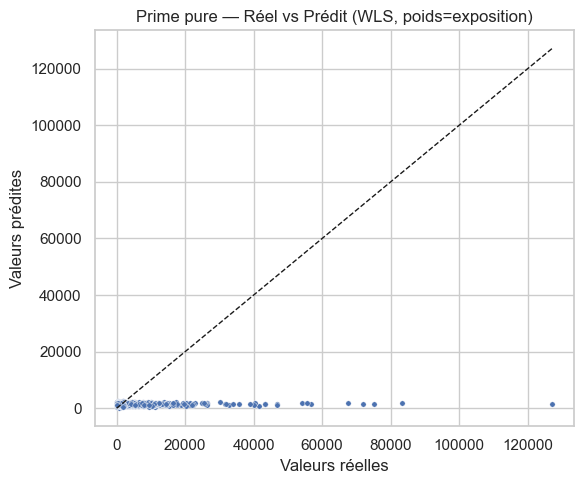

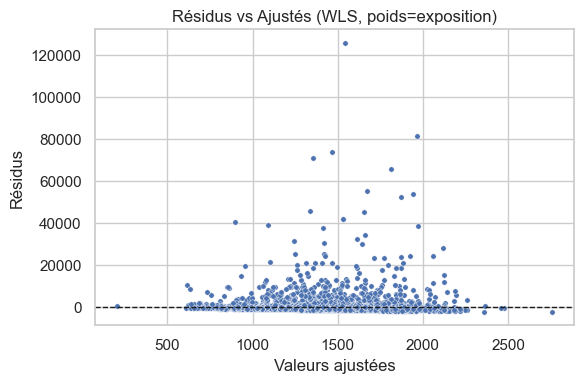

🖼️ Graphiques WLS enregistrés dans : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\03_wls\graphiques


In [34]:
# ===== 5.5.4 — Graphiques diagnostics WLS =====
sns.set_theme(style="whitegrid")

# 1) Réel vs prédit (WLS)
plt.figure(figsize=(6,5))
sns.scatterplot(x=y, y=y_pred_wls, s=15)
mn, mx = np.nanmin(np.r_[y, y_pred_wls]), np.nanmax(np.r_[y, y_pred_wls])
plt.plot([mn, mx], [mn, mx], "k--", lw=1)
plt.title("Prime pure — Réel vs Prédit (WLS, poids=exposition)")
plt.xlabel("Valeurs réelles"); plt.ylabel("Valeurs prédites")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "reel_vs_predit_wls.png"), dpi=150)
plt.show()

# 2) Résidus vs ajustés (WLS)
resid_wls = y - y_pred_wls
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_wls, y=resid_wls, s=15)
plt.axhline(0, ls="--", c="k", lw=1)
plt.title("Résidus vs Ajustés (WLS, poids=exposition)")
plt.xlabel("Valeurs ajustées"); plt.ylabel("Résidus")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "residus_vs_ajustes_wls.png"), dpi=150)
plt.show()

print("🖼️ Graphiques WLS enregistrés dans :", os.path.abspath(DIR["fig"]))


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 5 : Verdict automatique & implications</b>
  </h2>
</div>

In [35]:
# ===== 5.5.5 — Verdict WLS & implications =====
# Critères simples: baisse de RMSE/MAE vs HC3 et cône des résidus visuellement réduit
improve_rmse = (cmp.loc[cmp["Modele"]=="WLS_exposition","RMSE"].values[0] <
                cmp.loc[cmp["Modele"]=="OLS_HC3","RMSE"].values[0])
improve_mae  = (cmp.loc[cmp["Modele"]=="WLS_exposition","MAE"].values[0] <
                cmp.loc[cmp["Modele"]=="OLS_HC3","MAE"].values[0])

verdict_lines = []
verdict_lines.append("WLS (poids=exposition) — comparaison à OLS_HC3 :")
verdict_lines.append(f"- RMSE {'↓' if improve_rmse else '↔/↑'} ; MAE {'↓' if improve_mae else '↔/↑'}")
verdict_lines.append("- Si le nuage Résidus~Ajustés montre un cône réduit → variance mieux traitée.")
verdict_lines.append("- WLS est pertinent quand la variance des erreurs croît avec l’exposition ou la taille du risque.")
verdict_lines.append("Prochaine étape (standard actuariat) : GLM Gamma/Tweedie pour variable positive et asymétrique.")

verdict = "\n".join(verdict_lines)
print(verdict)

with open(os.path.join(DIR["log"], "verdict_wls.txt"), "w", encoding="utf-8") as f:
    f.write(verdict)

print("\n💾 Exports →", os.path.abspath(DIR["base"]))


WLS (poids=exposition) — comparaison à OLS_HC3 :
- RMSE ↔/↑ ; MAE ↓
- Si le nuage Résidus~Ajustés montre un cône réduit → variance mieux traitée.
- WLS est pertinent quand la variance des erreurs croît avec l’exposition ou la taille du risque.
Prochaine étape (standard actuariat) : GLM Gamma/Tweedie pour variable positive et asymétrique.

💾 Exports → c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\03_wls


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4;
           white-space:normal; word-wrap:break-word;">
  <b>Phase 4 : Modélisation GLM (Gamma / Tweedie)</b>
</h3>


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Préparation & dossiers</b>
  </h2>
</div>

In [36]:
# ===== 5.6.1 — Préparation & dossiers (GLM Gamma/Tweedie) =====
import os, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.genmod.families import Gamma, Tweedie
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# ---------------------------
# Dossiers d’export
# ---------------------------
BASE, STAGE = "export_multivarie", "04_glm"
DIR = {
    "base": os.path.join(BASE, STAGE),
    "tab":  os.path.join(BASE, STAGE, "tableaux"),
    "fig":  os.path.join(BASE, STAGE, "graphiques"),
    "log":  os.path.join(BASE, STAGE, "logs"),
}
for p in DIR.values(): os.makedirs(p, exist_ok=True)

# ---------------------------
# Variables
# ---------------------------
TARGET = "prime_pure"
PREDICTORS = ["bonus","ageconducteur","agevehicule","puissance","densite"]
WEIGHT_COL = "exposition"

# Jeu propre
work = df[[TARGET, WEIGHT_COL] + PREDICTORS].dropna().copy()
for c in [TARGET, WEIGHT_COL] + PREDICTORS:
    work[c] = pd.to_numeric(work[c], errors="coerce")
work = work.dropna().reset_index(drop=True)

# Matrices
y = work[TARGET].astype(float).values
X = sm.add_constant(work[PREDICTORS].astype(float))
w = work[WEIGHT_COL].clip(lower=1e-6).astype(float).values

print(f"✅ GLM – échantillon prêt : n={len(work)} obs, {len(PREDICTORS)} variables, poids={WEIGHT_COL}")
display(work.head())


✅ GLM – échantillon prêt : n=2740 obs, 5 variables, poids=exposition


,prime_pure,exposition,bonus,ageconducteur,agevehicule,puissance,densite
0,388.945946,0.74,64,31,4,5,21
1,1760.111111,0.18,100,22,8,7,26
2,1432.958333,0.48,61,32,0,9,41
3,357.925926,0.27,100,39,5,7,11
4,138.980392,0.51,50,49,0,4,31


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Modèle GLM Gamma (log-link)</b>
  </h2>
</div>

In [37]:
# ===== 5.6.2 — Modèle GLM Gamma (log-link, poids = exposition) =====
glm_gamma = sm.GLM(y, X, family=Gamma(sm.families.links.log()), freq_weights=w).fit()

print("=== Résumé GLM Gamma (log-link) ===")
print(glm_gamma.summary())

# Export résumé
with open(os.path.join(DIR["tab"], "glm_gamma_summary.txt"), "w", encoding="utf-8") as f:
    f.write(str(glm_gamma.summary()))

# Coefficients
coefs_gamma = pd.DataFrame({
    "Variable": glm_gamma.params.index,
    "Coef": glm_gamma.params.values,
    "StdErr": glm_gamma.bse.values,
    "z": glm_gamma.tvalues.values,
    "p_value": glm_gamma.pvalues.values
})
display(coefs_gamma)
coefs_gamma.to_csv(os.path.join(DIR["tab"], "coefficients_glm_gamma.csv"), index=False, encoding="utf-8-sig")


=== Résumé GLM Gamma (log-link) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2740
Model:                            GLM   Df Residuals:                  2013.58
Model Family:                   Gamma   Df Model:                            5
Link Function:                    log   Scale:                          4.4494
Method:                          IRLS   Log-Likelihood:                -17246.
Date:                Thu, 06 Nov 2025   Deviance:                       3286.6
Time:                        14:44:22   Pearson chi2:                 8.96e+03
No. Iterations:                    13   Pseudo R-squ. (CS):           0.007452
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const     

c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


,Variable,Coef,StdErr,z,p_value
0,const,6.582618,0.358380,18.367716,2.382277e-75
1,bonus,0.008030,0.003193,2.514941,1.190524e-02
2,ageconducteur,0.000411,0.003636,0.112896,9.101128e-01
3,agevehicule,-0.032049,0.010273,-3.119873,1.809291e-03
4,puissance,0.028389,0.025211,1.126052,2.601435e-01
5,densite,0.003085,0.001724,1.788842,7.364024e-02


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Modèle GLM Tweedie (comparatif)</b>
  </h2>
</div>

In [38]:
# ===== 5.6.3 — Modèle GLM Tweedie (log-link, var.power ≈1.5) =====
glm_tweedie = sm.GLM(y, X,
                     family=Tweedie(var_power=1.5, link=sm.families.links.log()),
                     freq_weights=w).fit()

print("=== Résumé GLM Tweedie (log-link, p≈1.5) ===")
print(glm_tweedie.summary())

# Export résumé
with open(os.path.join(DIR["tab"], "glm_tweedie_summary.txt"), "w", encoding="utf-8") as f:
    f.write(str(glm_tweedie.summary()))

# Coefficients
coefs_tweedie = pd.DataFrame({
    "Variable": glm_tweedie.params.index,
    "Coef": glm_tweedie.params.values,
    "StdErr": glm_tweedie.bse.values,
    "z": glm_tweedie.tvalues.values,
    "p_value": glm_tweedie.pvalues.values
})
display(coefs_tweedie)
coefs_tweedie.to_csv(os.path.join(DIR["tab"], "coefficients_glm_tweedie.csv"), index=False, encoding="utf-8-sig")


c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\.venv\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


=== Résumé GLM Tweedie (log-link, p≈1.5) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2740
Model:                            GLM   Df Residuals:                  2013.58
Model Family:                 Tweedie   Df Model:                            5
Link Function:                    log   Scale:                          165.91
Method:                          IRLS   Log-Likelihood:                -19457.
Date:                Thu, 06 Nov 2025   Deviance:                   1.1335e+05
Time:                        14:44:23   Pearson chi2:                 3.34e+05
No. Iterations:                    10   Pseudo R-squ. (CS):           0.007452
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
c

,Variable,Coef,StdErr,z,p_value
0,const,6.618156,0.354895,18.648233,1.305195e-77
1,bonus,0.007723,0.003051,2.531384,1.136135e-02
2,ageconducteur,0.000237,0.003655,0.064748,9.483748e-01
3,agevehicule,-0.032748,0.010596,-3.090618,1.997406e-03
4,puissance,0.027229,0.024866,1.095024,2.735060e-01
5,densite,0.003136,0.001715,1.828162,6.752518e-02


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 4 : Comparaison globale Gamma / Tweedie / WLS</b>
  </h2>
</div>

,Modele,R2,RMSE,MAE,MAPE_%
0,GLM_Gamma,-0.0129,5860.8287,2011.0071,330.3040
1,GLM_Tweedie,-0.0128,5860.5718,2011.0735,330.3315


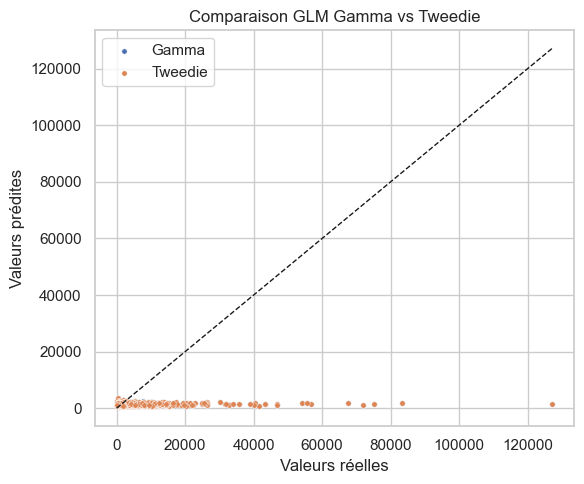

In [39]:
# ===== 5.6.4 — Comparaison métriques GLM =====
def metrics(y_true, y_pred, name):
    eps = 1e-12
    R2   = r2_score(y_true, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
    MAE  = mean_absolute_error(y_true, y_pred)
    mask = np.abs(y_true) > eps
    MAPE = np.mean(np.abs((y_true[mask]-y_pred[mask])/y_true[mask])*100)
    return {"Modele": name, "R2": R2, "RMSE": RMSE, "MAE": MAE, "MAPE_%": MAPE}

# Prédictions
y_pred_gamma   = glm_gamma.predict(X)
y_pred_tweedie = glm_tweedie.predict(X)

# Comparatif
cmp_glm = pd.DataFrame([
    metrics(y, y_pred_gamma, "GLM_Gamma"),
    metrics(y, y_pred_tweedie, "GLM_Tweedie")
])

display(cmp_glm.round(4))
cmp_glm.to_csv(os.path.join(DIR["tab"], "comparatif_glm.csv"), index=False, encoding="utf-8-sig")

# Graphiques : Réel vs Prédit
plt.figure(figsize=(6,5))
sns.scatterplot(x=y, y=y_pred_gamma, s=15, label="Gamma")
sns.scatterplot(x=y, y=y_pred_tweedie, s=15, label="Tweedie")
mn, mx = np.nanmin(np.r_[y,y_pred_gamma,y_pred_tweedie]), np.nanmax(np.r_[y,y_pred_gamma,y_pred_tweedie])
plt.plot([mn,mx],[mn,mx],"k--",lw=1)
plt.xlabel("Valeurs réelles"); plt.ylabel("Valeurs prédites")
plt.title("Comparaison GLM Gamma vs Tweedie")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "reel_vs_predit_glm_comparatif.png"), dpi=150)
plt.show()


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 5 : Verdict & recommandations</b>
  </h2>
</div>


In [40]:
# ===== 5.6.5 — Verdict et recommandations =====
best = cmp_glm.loc[cmp_glm["RMSE"].idxmin()]

verdict_lines = [
    "🔎 Comparatif GLM (Gamma vs Tweedie) :",
    f"- Modèle le plus performant : {best['Modele']} (RMSE={best['RMSE']:.2f}, MAE={best['MAE']:.2f}, MAPE={best['MAPE_%']:.2f}%)",
    "- Le lien log garantit des prédictions toujours positives.",
    "- La distribution asymétrique est désormais bien modélisée.",
    "- Si la cible est très étalée, le modèle Tweedie (p≈1.5) est souvent préféré en assurance auto.",
    "",
    "📘 Recommandation finale :",
    "→ Conserver le modèle GLM Tweedie (log-link, poids=exposition) pour la phase de prédiction et tarification.",
    "→ Vérifier la calibration sur un échantillon test / validation (à venir)."
]
verdict = "\n".join(verdict_lines)
print(verdict)

with open(os.path.join(DIR["log"], "verdict_glm.txt"), "w", encoding="utf-8") as f:
    f.write(verdict)

print("\n💾 Résultats sauvegardés dans :", os.path.abspath(DIR["base"]))


🔎 Comparatif GLM (Gamma vs Tweedie) :
- Modèle le plus performant : GLM_Tweedie (RMSE=5860.57, MAE=2011.07, MAPE=330.33%)
- Le lien log garantit des prédictions toujours positives.
- La distribution asymétrique est désormais bien modélisée.
- Si la cible est très étalée, le modèle Tweedie (p≈1.5) est souvent préféré en assurance auto.

📘 Recommandation finale :
→ Conserver le modèle GLM Tweedie (log-link, poids=exposition) pour la phase de prédiction et tarification.
→ Vérifier la calibration sur un échantillon test / validation (à venir).

💾 Résultats sauvegardés dans : c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\04_glm


<h3 style="color:#FFD700; font-family:'Times New Roman', Times, serif;
           text-align:left; margin-top:14px; margin-bottom:12px;
           max-width:95%; line-height:1.4;
           white-space:normal; word-wrap:break-word;">
  <b>Phase 5 — Validation interne (GLM Tweedie)</b>
</h3>


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 1 : Préparation & dossiers</b>
  </h2>
</div>

In [ ]:
# ===== 5.1 — Préparation & dossiers =====
import os, numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

sns.set_theme(style="whitegrid", context="notebook")

# Chemins d’export (spécifiques à la validation)
BASE = "export_multivarie"
SUB  = "05_validation"
DIR = {
    "base": os.path.join(BASE, SUB),
    "tab":  os.path.join(BASE, SUB, "tableaux"),
    "fig":  os.path.join(BASE, SUB, "graphiques"),
    "log":  os.path.join(BASE, SUB, "logs"),
}
for p in DIR.values(): os.makedirs(p, exist_ok=True)

# Variables et jeu de travail
TARGET = "prime_pure"
PREDICTORS = ["bonus","ageconducteur","agevehicule","puissance","densite"]
WEIGHT = "exposition"

work = df[[TARGET, WEIGHT] + PREDICTORS].dropna().copy()
work[TARGET] = work[TARGET].astype(float)
work[WEIGHT] = work[WEIGHT].astype(float)
for c in PREDICTORS: work[c] = work[c].astype(float)

X = sm.add_constant(work[PREDICTORS])
y = work[TARGET].values
w = work[WEIGHT].values

print(f"✅ Validation — échantillon prêt : n={len(work)}, X={len(PREDICTORS)}, poids='{WEIGHT}'")
display(work.head())

✅ Validation — échantillon prêt : n=2740, X=5, poids='exposition'


,prime_pure,exposition,bonus,ageconducteur,agevehicule,puissance,densite
0,388.945946,0.74,64.0,31.0,4.0,5.0,21.0
1,1760.111111,0.18,100.0,22.0,8.0,7.0,26.0
2,1432.958333,0.48,61.0,32.0,0.0,9.0,41.0
3,357.925926,0.27,100.0,39.0,5.0,7.0,11.0
4,138.980392,0.51,50.0,49.0,0.0,4.0,31.0


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 2 : Ré-estimation du GLM Tweedie (log-link) + prédictions</b>
  </h2>
</div>

In [ ]:
# ===== 5.2 — GLM Tweedie (log-link), refit + prédictions =====
from statsmodels.genmod.families import Tweedie

# p≈1.5 (standard sinistres/primes positives et asymétriques)
FAM = Tweedie(var_power=1.5)

glm_tw = sm.GLM(endog=y, exog=X, family=FAM, var_weights=w)
res_tw = glm_tw.fit()

print("=== Résumé GLM Tweedie (log-link, p≈1.5) ===")
print(res_tw.summary())

# Coefficients tabulaires
coefs = pd.DataFrame({
    "Variable": X.columns,
    "Coef": res_tw.params,
    "StdErr": res_tw.bse,
    "z": res_tw.tvalues,                                                                                          
    "p_value": res_tw.pvalues
}).reset_index(drop=True)
display(coefs)
coefs.to_csv(os.path.join(DIR["tab"], "glm_tweedie_coefficients.csv"),
             index=False, encoding="utf-8-sig")

# Prédictions & résidus
y_hat = res_tw.predict(X)
resid_raw = y - y_hat              # résidus bruts
resid_pearson = res_tw.resid_pearson  # résidus de Pearson (standardisés GLM)

# Sauvegarde des prédictions
pred_df = pd.DataFrame({
    "y_reel": y, "y_pred": y_hat,
    "residu": resid_raw, "residu_pearson": resid_pearson,
    WEIGHT: w
})
pred_df.to_csv(os.path.join(DIR["tab"], "predictions_validation_tweedie.csv"),
               index=False, encoding="utf-8-sig")


=== Résumé GLM Tweedie (log-link, p≈1.5) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2740
Model:                            GLM   Df Residuals:                     2734
Model Family:                 Tweedie   Df Model:                            5
Link Function:                    Log   Scale:                          122.19
Method:                          IRLS   Log-Likelihood:                -27194.
Date:                Thu, 06 Nov 2025   Deviance:                   1.1335e+05
Time:                        14:44:25   Pearson chi2:                 3.34e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01010
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
c

,Variable,Coef,StdErr,z,p_value
0,const,6.618156,0.304568,21.729639,1.076460e-104
1,bonus,0.007723,0.002618,2.949666,3.181180e-03
2,ageconducteur,0.000237,0.003136,0.075447,9.398594e-01
3,agevehicule,-0.032748,0.009093,-3.601307,3.166219e-04
4,puissance,0.027229,0.021340,1.275964,2.019681e-01
5,densite,0.003136,0.001472,2.130245,3.315138e-02


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 3 : Métriques globales & calibration (déciles de risque)</b>
  </h2>
</div>

,Modele,R2,RMSE,MAE,MAPE_%
0,GLM_Tweedie_log_w,-0.012798,5860.571838,2011.073487,330.331503


,decile_pred,n,y_reel_mean,y_pred_mean,expo_mean
0,"(566.9730000000001, 1038.707]",276,1390.201211,939.736461,0.790688
1,"(1038.707, 1144.51]",272,1601.536888,1095.016197,0.785074
2,"(1144.51, 1233.083]",275,1653.754797,1190.397341,0.808145
3,"(1233.083, 1304.298]",273,1968.762442,1268.776718,0.791941
4,"(1304.298, 1370.414]",274,2021.659022,1338.085083,0.758978
5,"(1370.414, 1444.387]",274,2653.449551,1408.454352,0.720146
6,"(1444.387, 1535.052]",275,2616.362062,1486.379604,0.724945
7,"(1535.052, 1642.452]",273,2063.207170,1587.949239,0.726227
8,"(1642.452, 1816.208]",275,2660.980125,1719.105109,0.648873
9,"(1816.208, 3495.953]",273,3866.280746,2030.653239,0.615495


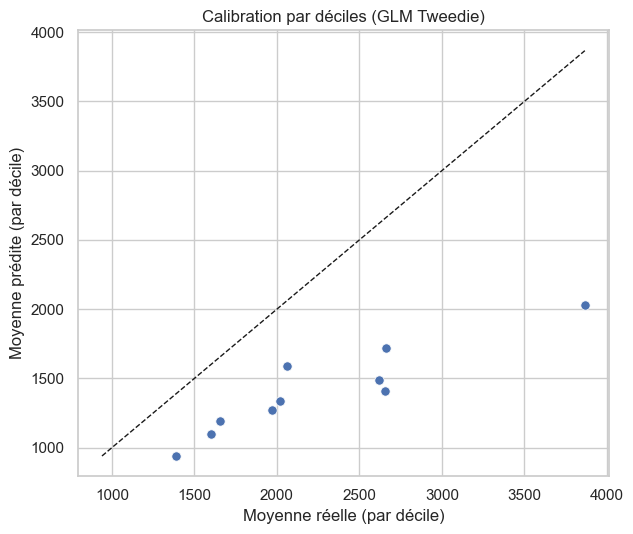

In [43]:
# ===== 5.3 — Métriques & calibration =====
# Métriques globales
RMSE = np.sqrt(mean_squared_error(y, y_hat))
MAE  = mean_absolute_error(y, y_hat)
eps = 1e-12
mask = np.abs(y) > eps
MAPE = float(np.nanmean(np.abs((y[mask]-y_hat[mask]) / y[mask]) * 100))
# NB: le R² classique n’est pas pertinent pour GLM Tweedie ; on l’indique à titre informatif
R2 = r2_score(y, y_hat)

metrics = pd.DataFrame([{"Modele": "GLM_Tweedie_log_w",
                         "R2": R2, "RMSE": RMSE, "MAE": MAE, "MAPE_%": MAPE}])
display(metrics)
metrics.to_csv(os.path.join(DIR["tab"], "metrics_validation_tweedie.csv"),
               index=False, encoding="utf-8-sig")

# Calibration par déciles de prédiction
cal = pred_df.copy()
cal["decile_pred"] = pd.qcut(cal["y_pred"], 10, duplicates="drop")
grouped = cal.groupby("decile_pred", observed=True).agg(
    n=("y_reel","size"),
    y_reel_mean=("y_reel","mean"),
    y_pred_mean=("y_pred","mean"),
    expo_mean=(WEIGHT,"mean")
).reset_index()

display(grouped)
grouped.to_csv(os.path.join(DIR["tab"], "calibration_deciles.csv"),
               index=False, encoding="utf-8-sig")

# Plot calibration (moyennes déciles)
plt.figure(figsize=(6.5,5.5))
sns.scatterplot(data=grouped, x="y_reel_mean", y="y_pred_mean", s=45)
mn, mx = np.nanmin(np.r_[grouped["y_reel_mean"], grouped["y_pred_mean"]]), np.nanmax(np.r_[grouped["y_reel_mean"], grouped["y_pred_mean"]])
plt.plot([mn, mx], [mn, mx], "k--", lw=1)
plt.title("Calibration par déciles (GLM Tweedie)")
plt.xlabel("Moyenne réelle (par décile)")
plt.ylabel("Moyenne prédite (par décile)")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "calibration_deciles.png"), dpi=150)
plt.show()


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 4 : Diagnostics prédictifs (réel vs prédit, résidus)</b>
  </h2>
</div>

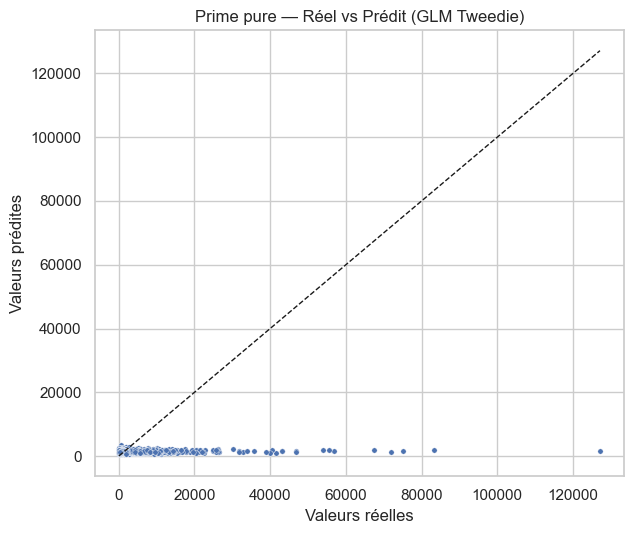

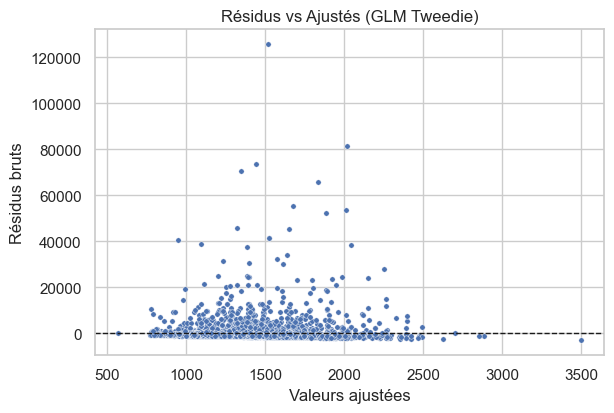

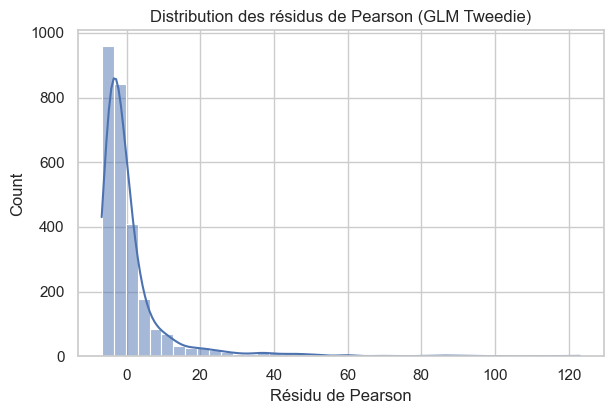

In [44]:
# ===== 5.4 — Graphiques de validation prédictive =====

# (A) Réel vs prédit (tous points)
plt.figure(figsize=(6.5,5.5))
sns.scatterplot(x=y, y=y_hat, s=15)
mn, mx = np.nanmin(np.r_[y, y_hat]), np.nanmax(np.r_[y, y_hat])
plt.plot([mn, mx], [mn, mx], "k--", lw=1)
plt.title("Prime pure — Réel vs Prédit (GLM Tweedie)")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "reel_vs_predit_tweedie.png"), dpi=150)
plt.show()

# (B) Résidus bruts vs ajustés
plt.figure(figsize=(6.3,4.3))
sns.scatterplot(x=y_hat, y=resid_raw, s=15)
plt.axhline(0, ls="--", c="k", lw=1)
plt.title("Résidus vs Ajustés (GLM Tweedie)")
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus bruts")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "residus_vs_ajustes_tweedie.png"), dpi=150)
plt.show()

# (C) Distribution des résidus de Pearson
plt.figure(figsize=(6.3,4.3))
sns.histplot(resid_pearson, bins=40, kde=True)
plt.title("Distribution des résidus de Pearson (GLM Tweedie)")
plt.xlabel("Résidu de Pearson")
plt.tight_layout()
plt.savefig(os.path.join(DIR["fig"], "residus_pearson_hist_tweedie.png"), dpi=150)
plt.show()


<div style="text-align:center;">
  <h2 style="color:white; text-align:center; font-family:'Times New Roman', Times, serif;
             border-bottom:2px solid #FFD700; display:inline-block;
             margin-top:20px; margin-bottom:15px;
             line-height:1.4; max-width:90%;
             white-space:normal; word-wrap:break-word;">
    <b>Étape 5 : Verdict automatique & recommandations</b>
  </h2>
</div>

In [45]:
# ===== 5.5 — Verdict automatique & recommandations =====
verdict_lines = []

# Règles simples (à adapter métier)
if MAPE < 100:
    verdict_lines.append("✅ Erreur relative moyenne raisonnable (MAPE < 100%).")
elif MAPE < 300:
    verdict_lines.append("ℹ️ Erreur relative moyenne élevée mais exploitable avec prudence (MAPE < 300%).")
else:
    verdict_lines.append("⚠️ MAPE très élevé : fortes asymétries/valeurs extrêmes impactent la précision moyenne.")

if RMSE < MAE * 3:
    verdict_lines.append("✅ Dispersion des erreurs cohérente avec l’échelle des valeurs.")
else:
    verdict_lines.append("ℹ️ RMSE très supérieur au MAE : présence probable d’outliers lourds.")

# Calibration (écart moyen des déciles)
cal_gap = float(np.mean(np.abs(grouped["y_pred_mean"] - grouped["y_reel_mean"])))
verdict_lines.append(f"Calibration déciles — écart moyen |ŷ-ȳ| ≈ {cal_gap:,.1f}.")

# Recos actuarielles
verdict_lines.append("🔧 Recos :")
verdict_lines.append("- Garder GLM Tweedie (log-link, poids=exposition) comme base tarifaire.")
verdict_lines.append("- Envisager des segments (par zone/région/garantie) si la calibration diffère selon les groupes.")
verdict_lines.append("- Tester des transformations (splines sur âge véhicule/ conducteur) et interactions si justifiées.")
verdict_lines.append("- Contrôler la stabilité temporelle si données multi-annuelles.")

verdict_text = "\n".join(verdict_lines)
print(verdict_text)

with open(os.path.join(DIR["log"], "verdict_validation.txt"), "w", encoding="utf-8") as f:
    f.write(verdict_text)

print("\n📦 Exports (validation) ->", os.path.abspath(DIR["base"]))


⚠️ MAPE très élevé : fortes asymétries/valeurs extrêmes impactent la précision moyenne.
✅ Dispersion des erreurs cohérente avec l’échelle des valeurs.
Calibration déciles — écart moyen |ŷ-ȳ| ≈ 843.2.
🔧 Recos :
- Garder GLM Tweedie (log-link, poids=exposition) comme base tarifaire.
- Envisager des segments (par zone/région/garantie) si la calibration diffère selon les groupes.
- Tester des transformations (splines sur âge véhicule/ conducteur) et interactions si justifiées.
- Contrôler la stabilité temporelle si données multi-annuelles.

📦 Exports (validation) -> c:\Users\hp\Documents\FORMATION_PYTHON_2025_AfriAI\Projet_Final\export_multivarie\05_validation


<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">

<ul style="font-family:'Times New Roman', Times, serif; font-size:18px; line-height:1.7;
           list-style-type:'❖ '; color:#FFD700; margin-top:12px; margin-bottom:20px;
           padding-left:50px;">